# Section 3.1 — Estimators

This notebook contains the code examples from [Section 3.1 Estimators]() of the **No Bullshit Guide to Statistics**. Use the "rocket" icon at the top-right to make the code cells interactive (Live Code), or run this notebook an ephemeral JupyterLab cloud instance (Binder).

We'll begin our study of inferential statistics by introducing **estimators**,
which are the math tools used for computing **confidence intervals** and running **hypothesis tests**.

![simplified_estimators.png](../stats_overview/figures/simplified_estimators.png)

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot helper functions
from ministats import plot_pdf

In [3]:
# Figures setup
plt.clf()
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/estimators"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$


(this cell contains the macro definitions $\stderr{\theta}$, $\stderrhat{}$, $\Mean$, ...)

### Applications of sampling distributions

- Parameter estimates
- Confidence intervals (next section)
- Test statistics (remainder of the sections in this chapter)


## Definitions


### Review of data concepts

To get things started, let's review the data analysis concepts:

-   *Population*: the entire group of individuals we're interested in.
    We generally assume it's impossible to collect measurements for the
    entire population, because it consists of thousands or millions of
    individuals.

-   *Sample* $\mathbf{x} = (x_1, x_2, \ldots, x_n)$: a sequence of $n$
    observations from the population. Each $x_i$ corresponds to a
    measurement from one individual randomly selected from the
    population.

-   *Sample statistic*: any quantity computed from the sample
    $\mathbf{x}$.

-   *Descriptive statistics*: numerical summaries that describe the
    characteristics of the sample $\mathbf{x}$. Example of descriptive
    statistics include, the sample mean $\overline{\mathbf{x}}$, the
    sample variance $s_{\mathbf{x}}^2$, and the sample standard
    deviation $s_{\mathbf{x}}$.

### Review of probability concepts

Let's review the main concepts and the notation we used to describe probability models:

-   $X \sim \mathcal{M}(\theta)$: the *population probability model* describes
    the variability of the data in the population as a random variable
    $X$ with probability distribution $f_X$.

-   $\mathcal{M}$: the *model family* describes the general "shape" of the
    distribution. Examples of probability model families include the
    uniform $\mathcal{U}$, the normal $\mathcal{N}$, and the exponential $\text{Expon}$.

-   $\theta$: the *model parameters* that describe the specific
    population. Examples of model parameters: $\alpha$ and $\beta$ for
    uniform models, $\mu$ and $\sigma$ for normal models, and $\lambda$
    for exponential models.

-   $\tt{rvX}$: the *computer model* of the random variable
    $X \sim \mathcal{M}(\theta)$.

-   *Random sample* $\mathbf{X} = (X_1, X_2, \ldots, X_n)$: a sequence
    of $n$ observations from the population model. Each $X_i$ is an
    independent copy of the random variable $X \sim \mathcal{M}(\theta)$.

### New concepts

Building on the DATA and PROB definitions, we can now introduce the
notation and terminology around estimators:

-   *Estimate* $\hat{\theta}$: a statistic computed from the sample
    $\mathbf{x}$ for the purpose of making inferences about a population
    parameter $\theta$. For example, the sample mean
    $\overline{\mathbf{x}}$ is an estimate of the population mean
    $\mu_X$.

-   *Estimator* $g : \mathcal{X}^n \to \mathbb{R}$: the function that we use
    to compute the estimate $\hat{\theta}$ from a given sample
    $\mathbf{x} = (x_1, x_2, \ldots, x_n)$. We denote this as
    $\hat{\theta} = g(\mathbf{x})$. For example, the estimator
    $\Mean$ is defined as the function
    $\Mean(\mathbf{x}) = \tfrac{1}{n}\!\sum_{i=1}^n x_i$. We use
    the estimator $\Mean$ to compute the sample mean estimate
    $\overline{\mathbf{x}}$.

-   The *sampling distribution* of the estimator $g$ is denoted
    $\hat{\Theta} = g(\mathbf{X})$ and describes the estimates we
    can expect to observe from random samples from the population
    $\mathbf{X} = (X_1, X_2, \ldots, X_n)$. For example, the sampling
    distribution of the mean is the random variable
    $\overline{\mathbf{X}} = \Mean(\mathbf{X}) = \tfrac{1}{n}\!\sum_{i=1}^n X_i$.

-   The *standard error* of an estimator $g$ is denoted
    $\stderr{\hat{\theta}}$ and describes the standard deviation of its
    sampling distribution. For example, the standard error of the mean
    is denoted $\stderr{\overline{\mathbf{x}}}$.
    
![estimator from particular sample](./attachments/stats/estimators/Esimators_contexA.png)

Statistical inference is the use the values of the statistics obtained from the sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to estimate the population parameters $\theta$. For example,
the sample mean $\overline{\mathbf{x}}=\Mean(\mathbf{x})$ is an estimate of the population mean $\mu$,
and the sample variance $s_{\mathbf{x}}^2=\Var(\mathbf{x})$ is an estimate of the population variance $\sigma^2$.

## Estimators



Let's start with some estimators you're already familiar with (discussed in [descriptive statistics](./13_descriptive_statistics.ipynb)):

### Sample mean estimator

  - estimator: $\overline{\mathbf{x}} = \Mean(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n x_i$
  - gives an estimate for the population mean $\mu$

In [5]:
def mean(sample):
    return sum(sample) / len(sample)

# ALT. use .mean() method on a Pandas series
# ALT. use np.mean(sample)

### Sample variance and standard deviation

  - estimator: $s_{\mathbf{x}}^2 = \Var(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2$
  - gives an estimate for the population variance $\sigma^2$
  - note the denominator is $(n-1)$ and not $n$ 

In [6]:
def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

# ALT. use .var() method on a Pandas series
# ALT. use np.var(sample, ddof=1)

The standard deviation $s_{\mathbf{x}}^2$ is the square root of the sample variance:

$$
  \sqrt{s_{\mathbf{x}}^2}
   =  s_{\mathbf{x}}
   = \Std(\mathbf{x})
   = \sqrt{ \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2 }.
$$

We can now define a Python function `std` for computing the standard deviation by taking the square root of the variance:

In [7]:
def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

# ALT. use .std() method on a Pandas series
# ALT. use np.std(sample, ddof=1)

### Example 1: apple weight mean and variance


In [8]:
apples = pd.read_csv("../datasets/apples.csv")
asample = apples["weight"]
asample.count()

30

In [9]:
type(asample)

pandas.core.series.Series

In [10]:
# asample

In [11]:
type(asample.values)

numpy.ndarray

In [12]:
asample.values

array([205., 182., 192., 189., 217., 192., 210., 240., 225., 191., 193.,
       209., 167., 183., 210., 198., 239., 188., 179., 182., 200., 197.,
       245., 192., 201., 218., 198., 211., 208., 217.])

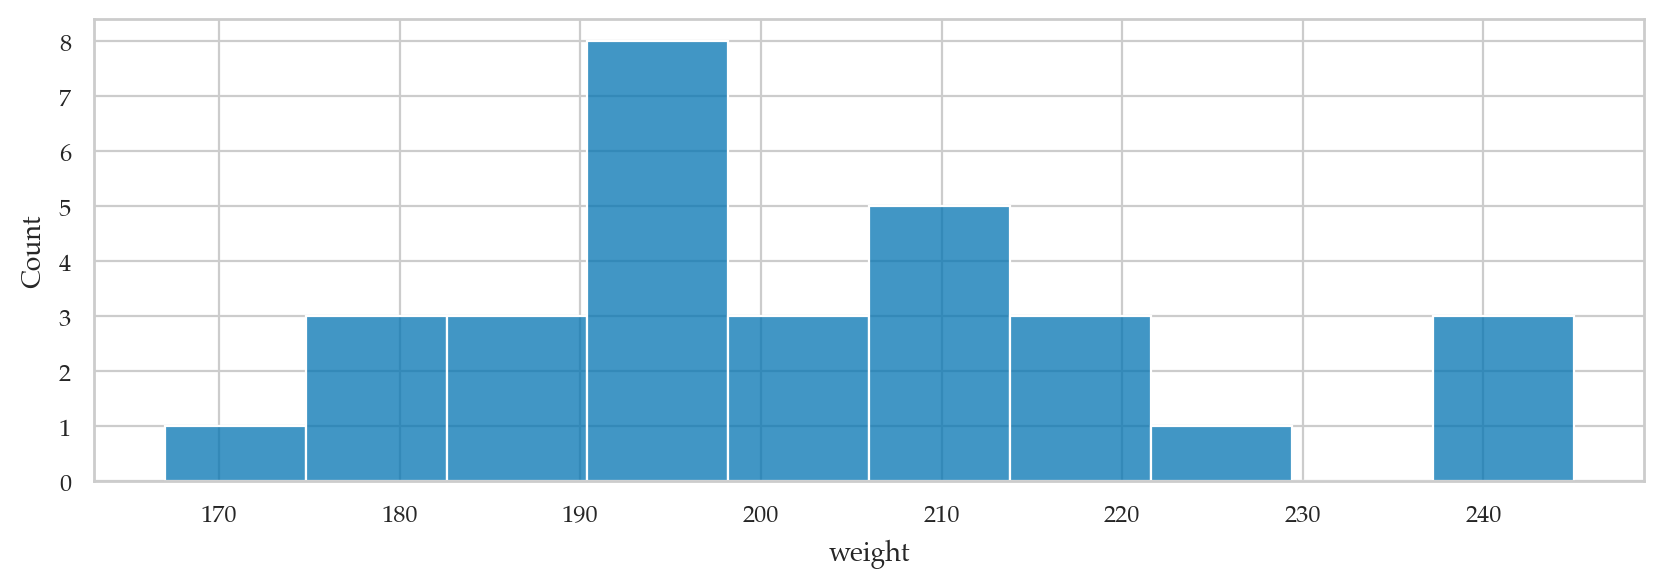

In [13]:
sns.histplot(asample, bins=10);

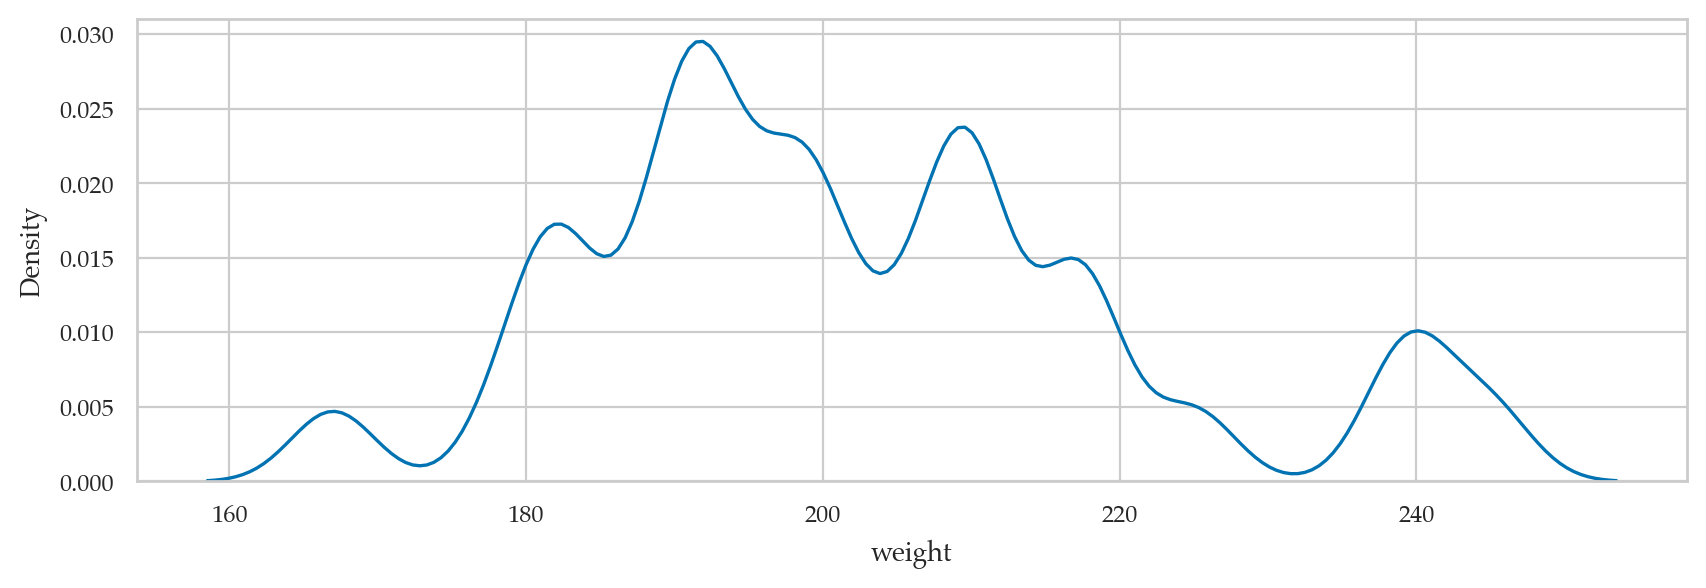

In [14]:
sns.kdeplot(asample, bw_adjust=0.3);

Next let's calculate the mean of the sample:

In [15]:
mean(asample)

202.6

Let's also calculate the variance and the standard deviation of the sample of the apple weights:

In [16]:
var(asample), std(asample)

(345.9724137931035, 18.60033370112223)

In [17]:
# ALT. call `.describe()` to get five-point summary
asample.describe()

count     30.000000
mean     202.600000
std       18.600334
min      167.000000
25%      191.250000
50%      199.000000
75%      210.750000
max      245.000000
Name: weight, dtype: float64

### Example 2: kombucha volume mean and variance


In [18]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
# kombucha

In [19]:
batch01 = kombucha[kombucha["batch"]==1]
ksample01 = batch01["volume"]
ksample01.count()

40

In [20]:
ksample01.values

array([1016.24,  993.88,  994.72,  989.27, 1008.65,  976.98, 1017.45,
        992.39, 1003.19,  997.51, 1014.62,  979.4 ,  996.78,  996.16,
       1011.34,  989.  ,  998.28,  991.22, 1000.42, 1005.83,  988.99,
       1011.45, 1009.02, 1005.02, 1009.01,  993.16,  998.77,  990.64,
        997.32, 1005.3 ,  993.08,  996.03,  993.13,  991.55,  993.29,
        999.87,  988.83, 1002.34, 1016.6 , 1007.42])

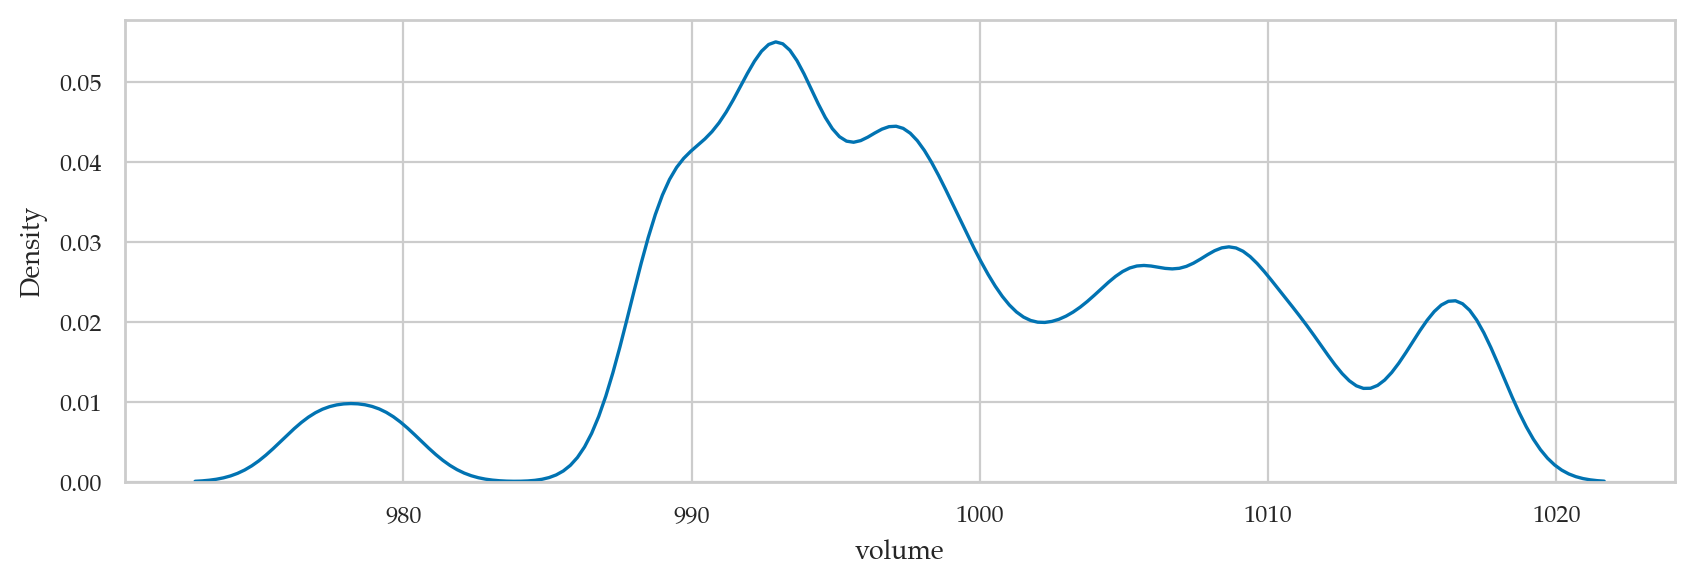

In [21]:
sns.kdeplot(ksample01, bw_adjust=0.3);

In [22]:
mean(ksample01)

999.10375

In [23]:
var(ksample01), std(ksample01)

(95.4365419871796, 9.769162808919686)

### Difference between sample means estimator

We'll now discuss an estimators that is specific for the comparison of the two groups.

  - estimator: $\hat{d} = \DMeans(\mathbf{x}_A, \mathbf{x}_B) = \Mean(\mathbf{x}_A) - \Mean(\mathbf{x}_B) = \overline{\mathbf{x}}_A - \overline{\mathbf{x}}_B$
  - gives an estimate for the difference between population means: $\Delta =  \mu_A - \mu_B$

In [24]:
def dmeans(xsample, ysample):
    """
    Compute the difference between group means of the samples.
    """
    dhat = mean(xsample) - mean(ysample)
    return dhat

### Example 3: comparison of electricity prices

Let's compute the difference between means of the East and West electricity prices.

In [25]:
eprices = pd.read_csv("../datasets/eprices.csv")
# eprices

In [26]:
epricesW = eprices[eprices["loc"]=="West"]
pricesW = epricesW["price"]
pricesW.values

array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5])

In [27]:
mean(pricesW), var(pricesW)

(9.155555555555557, 2.440277777777778)

In [28]:
epricesE = eprices[eprices["loc"]=="East"]
pricesE = epricesE["price"]
pricesE.values

array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5])

In [29]:
mean(pricesE), var(pricesE)

(6.155555555555555, 0.7702777777777778)

Let's calculate the mean of the prices in the East and the West:

In [30]:
mean(pricesW), mean(pricesE)

(9.155555555555557, 6.155555555555555)

To calculate the difference between means,
we can simply subtract these two numbers $\hat{d} = \overline{\mathbf{x}}_W - \overline{\mathbf{x}}_E$,
or simply call the function `dmeans`
which computes the estimate $\hat{d} = \textbf{DMeans}(\tt{pricesW}, \tt{pricesE})$.

In [31]:
dmeans(pricesW, pricesE)

3.0000000000000018

According to this estimate,
the average price Rob can expect in the East end is three cents cheaper,
on average,
as compared to the average electricity price in the West.


## Sampling distributions




Let's look at the same estimators that we described in the previous section,
but this time applied to *random* samples of size $n$:

- Sample mean: $\overline{\mathbf{X}} = \Mean(\mathbf{X}) = \tfrac{1}{n}\sum_{i=1}^n X_i$
- Sample variance: $S_{\mathbf{X}}^2 = \Var(\mathbf{X}) = \tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2$
- Sample standard deviation: $S_{\mathbf{X}} = \sqrt{\Var(\mathbf{X})} = \sqrt{\tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2}$
- Difference between sample means: $\hat{D} = \DMeans(\mathbf{X}, \mathbf{Y}) = \overline{\mathbf{X}} - \overline{\mathbf{Y}}$ 

Note these formulas is identical to the formulas we saw earlier.
The only difference is that we're calculating the functions $g$, $h$, and $d$ based on a random sample $\mathbf{X} = (X_1, X_2, \ldots, X_n)$,
instead of particular sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.

### Example 4

In [32]:
from ministats import gen_samples
from ministats import plot_samples
from ministats import gen_sampling_dist
from ministats import plot_sampling_dist

Let's generate $N=10$ samples $\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_{10}$, and compute the mean, the variance, and the standard deviation in each sample.

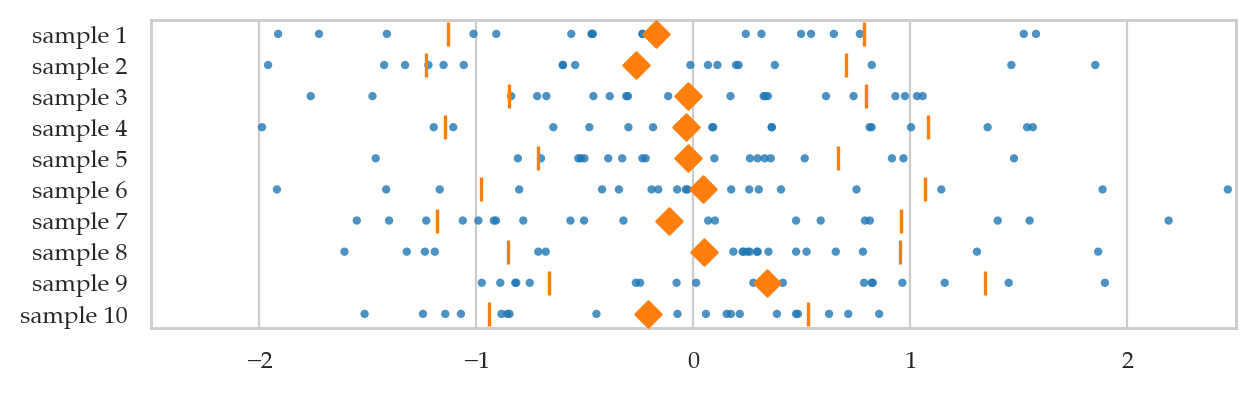

In [33]:
from scipy.stats import norm
rvZ = norm(0, 1)

zsamples_df = gen_samples(rvZ, n=20, N=10)
with plt.rc_context({"figure.figsize":(7, 2)}):
    ax = plot_samples(zsamples_df, xlims=[-2.5,2.5], showstd=True)

Now imagine repeating this process for $N=1000$ samples $\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_{1000}$.

We can obtain an approximation of the sampling distribution of the mean,
by plotting a histogram of the means we computed from the $1000$ random samples:

$$
  [\overline{\mathbf{z}}_1, \overline{\mathbf{z}}_2, \overline{\mathbf{z}}_3, \ldots, \overline{\mathbf{z}}_{1000}],
$$

where $\overline{\mathbf{z}}_i$ denotes the sample mean computed from the data in the $i$th sample: $\overline{\mathbf{z}}_i = \Mean(\mathbf{z}_i)$.

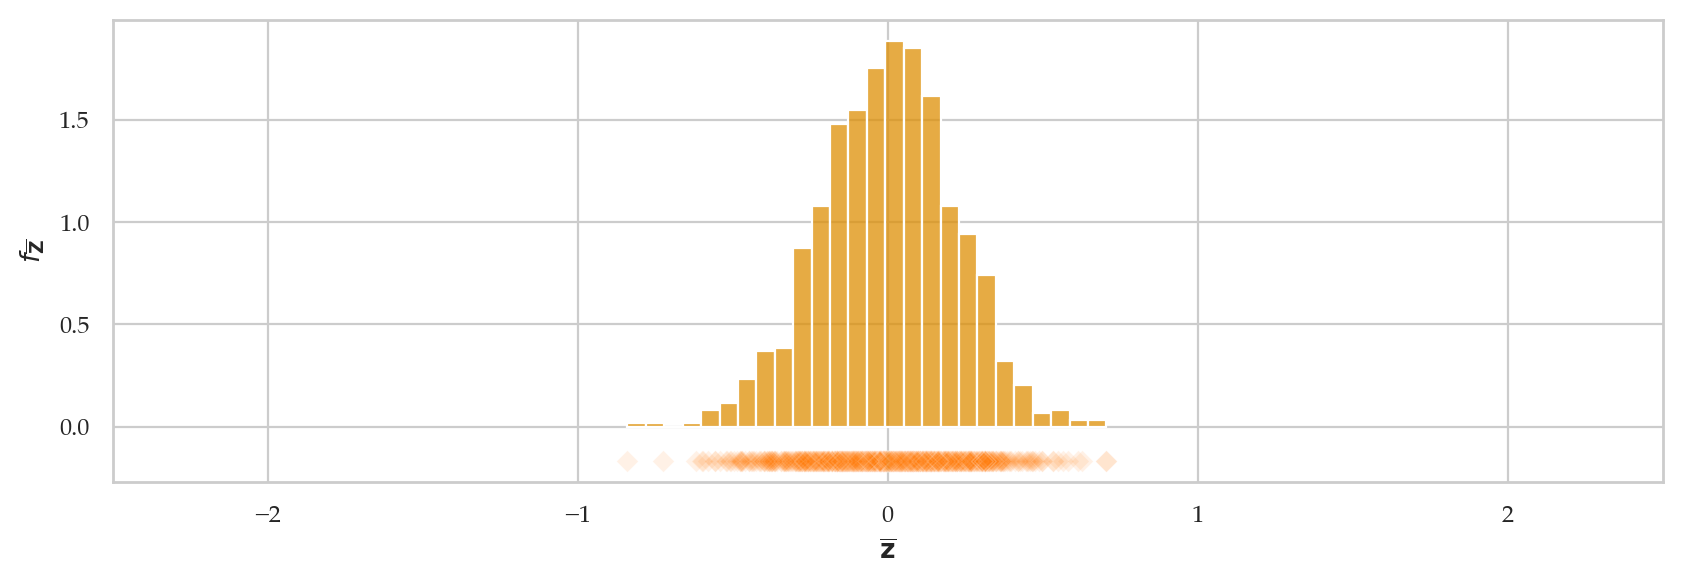

In [34]:
fig, ax = plt.subplots()

np.random.seed(43)
zbars = gen_sampling_dist(rvZ, estfunc=mean, n=20, N=1000)
plot_sampling_dist(zbars, ax=ax, binwidth=0.06, scatter="mean", filename=None)
ax.set_xlim([-2.5,2.5])
ax.set_xlabel(r"$\overline{\mathbf{z}}$")
ax.set_ylabel(r"$f_{\overline{\mathbf{Z}}}$");

We can obtain an approximation of the sampling distribution
of the sample standard deviation,
by plotting a histogram of the standard deviations we computed from the $1000$ random samples:

$$
  [s_{\mathbf{z}_1}, s_{\mathbf{z}_2}, s_{\mathbf{z}_3}, \ldots, s_{\mathbf{z}_{1000}}],
$$

where $s_{\mathbf{z}_i}$ denotes the standard deviation computed from the $i$th sample: $s_{\mathbf{z}_i} = \Mean(\mathbf{z}_i) = \sqrt{ \Var(\mathbf{z}_i) }$.

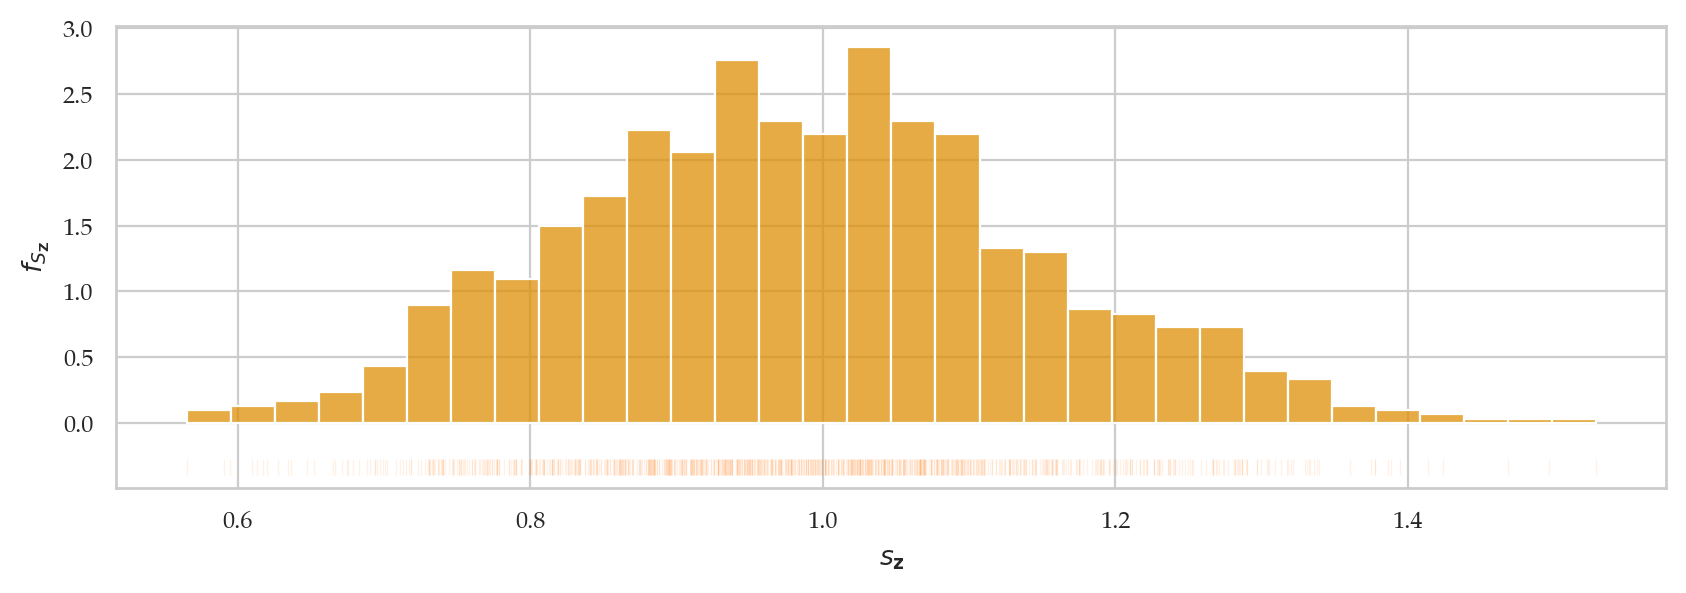

In [35]:
fig, ax = plt.subplots()

np.random.seed(44)
zstds = gen_sampling_dist(rvZ, estfunc=std, n=20, N=1000)
plot_sampling_dist(zstds, ax=ax, binwidth=0.03, scatter="std", filename=None)
ax.set_xlabel(r"$s_{\mathbf{z}}$")
ax.set_ylabel(r"$f_{S_{\mathbf{Z}}}$");

#### Illustration

The *sampling distribution* of the estimator $g$ is defined as the
random variable $\hat{\Theta} = g(\mathbf{X})$, which is the output of
the estimator $g$ when the input is a random sample
$\mathbf{X} = (X_1, X_2, \ldots, X_n)$.

![sampling distribution](./attachments/stats/estimators/Esimators_contexB.png)

### Estimator properties


-   The *bias* of the estimator $g$ is defined as:
    $\mathbf{bias}(g) = \mathbb{E}_{\mathbf{X}}[\hat{\Theta}] - \theta$.
    The bias measures how much the estimates differ from the true
    population parameter, on average.

-   The *variance* of an estimator is  
    $\mathbf{var}\big(\hat{\Theta}\big) = \mathbb{E}_{\mathbf{X}}\big[(\hat{\Theta} - \mathbb{E}[\hat{\Theta}])^2\big]$,
    and it measures the variability of the estimates around the average.

-   The *standard error* of the estimator $g$ is the square root of its
    variance and denoted
    $\stderr{\hat{\theta}} = \sqrt{ \mathbf{var}(\hat{\Theta}) }$.


#### Illustration

![bias and variance](attachments/stats/estimators/bias_and_variance_targets.png)

- a) all the arrow hits are on target (low bias) and close
  together (low variance). This is the best-case scenario. 
- b) the arrow hits are still close to each other, which means the estimator
  has low variance, but the hits are consistently "off" the centre (below
  and to the right), which illustrates a biased estimator.
- c) is an illustration of a high-variance estimator with no bias. The arrow hits
  are spread out, but mostly centred on the target.
- d) shows the worst case scenario: and estimator that has high bias
  (consistently off) and high variance (spread out).

### Computational approach to sampling distributions


In [36]:
def gen_sampling_dist(rv, estfunc, n, N=10000):
    estimates = []
    for i in range(0, N):
        sample = rv.rvs(n)
        estimate = estfunc(sample)
        estimates.append(estimate)
    return estimates

# ALT.
# from ministats import gen_sampling_dist

#### Example 5: sampling distributions of the kombucha volume

The probability distribution of the kombucha volume is know to
be $K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$. This is an usual case where we know the population parameters,
but we'll investigate because it allows us to learn more about sampling distributions.

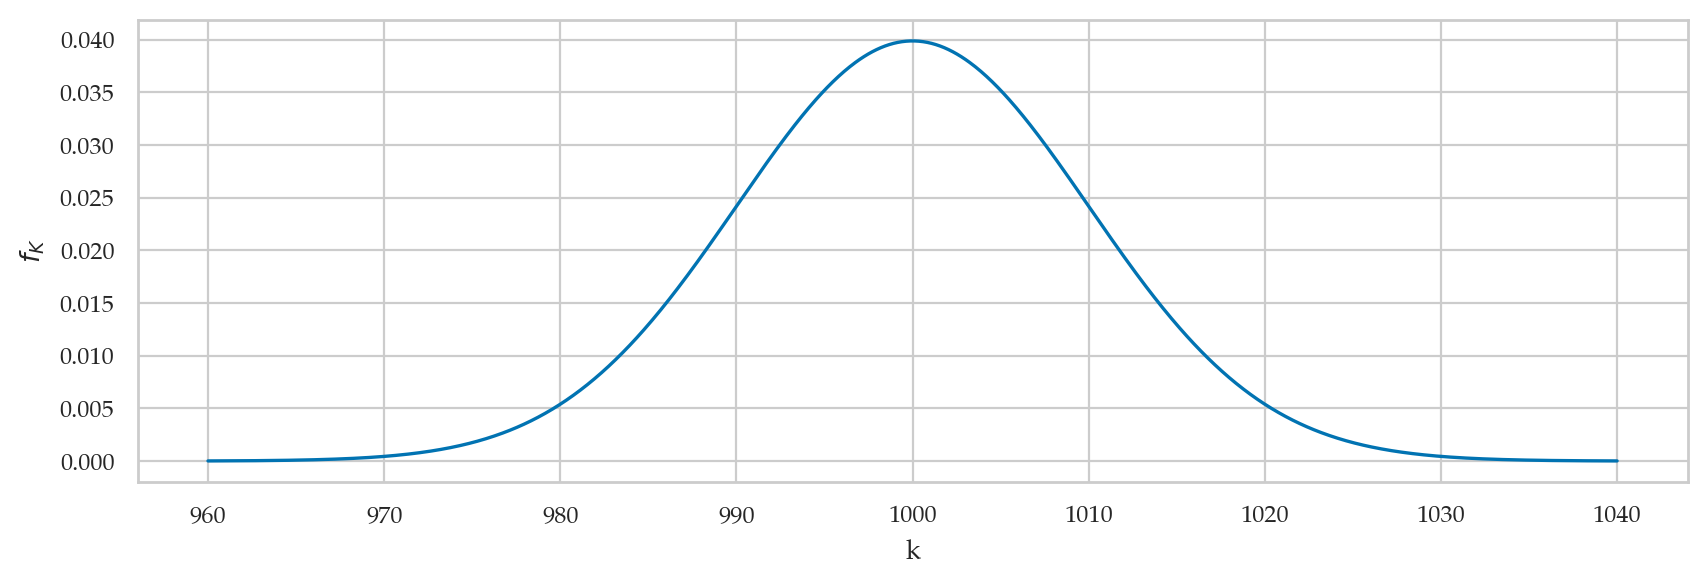

In [37]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

plot_pdf(rvK, xlims=[960,1040], rv_name="K");

##### Sampling distribution of the mean

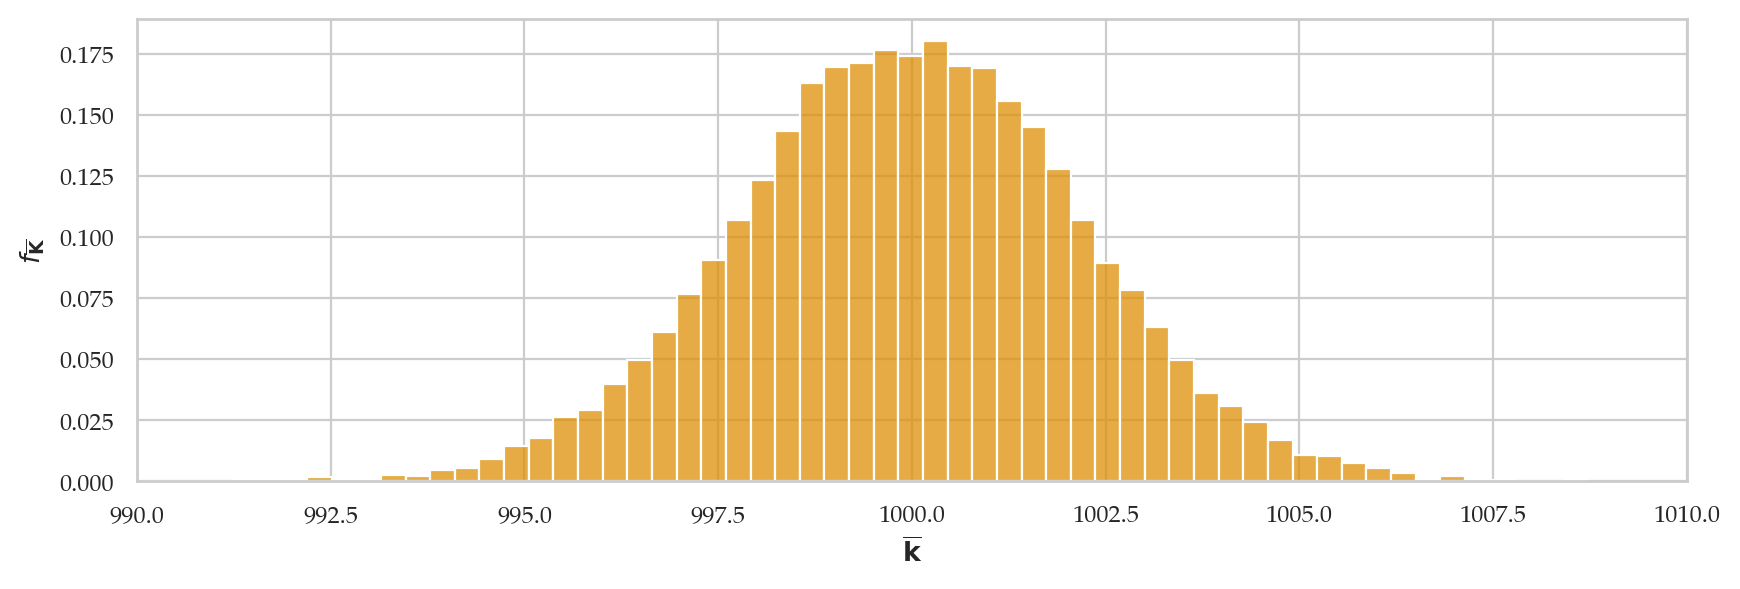

In [38]:
np.random.seed(43)
kbars20 = gen_sampling_dist(rvK, estfunc=mean, n=20)
ax = sns.histplot(kbars20, stat="density", bins=60, color=orange)
ax.set_xlim([990,1010])
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$");

We can verify the mean estimator is unbiased,
since the mean of the sampling distribution is very close to the population mean:

In [39]:
# observed,         population mean
np.mean(kbars20),   muK

(999.9759718368696, 1000)

Let's calculate the standard error of the estimator

In [40]:
# observed standard deviation
np.std(kbars20)

2.2080598530804387

In [41]:
# CLT prediction
sigmaK / np.sqrt(20)

2.23606797749979

##### Sampling distribution of the variance

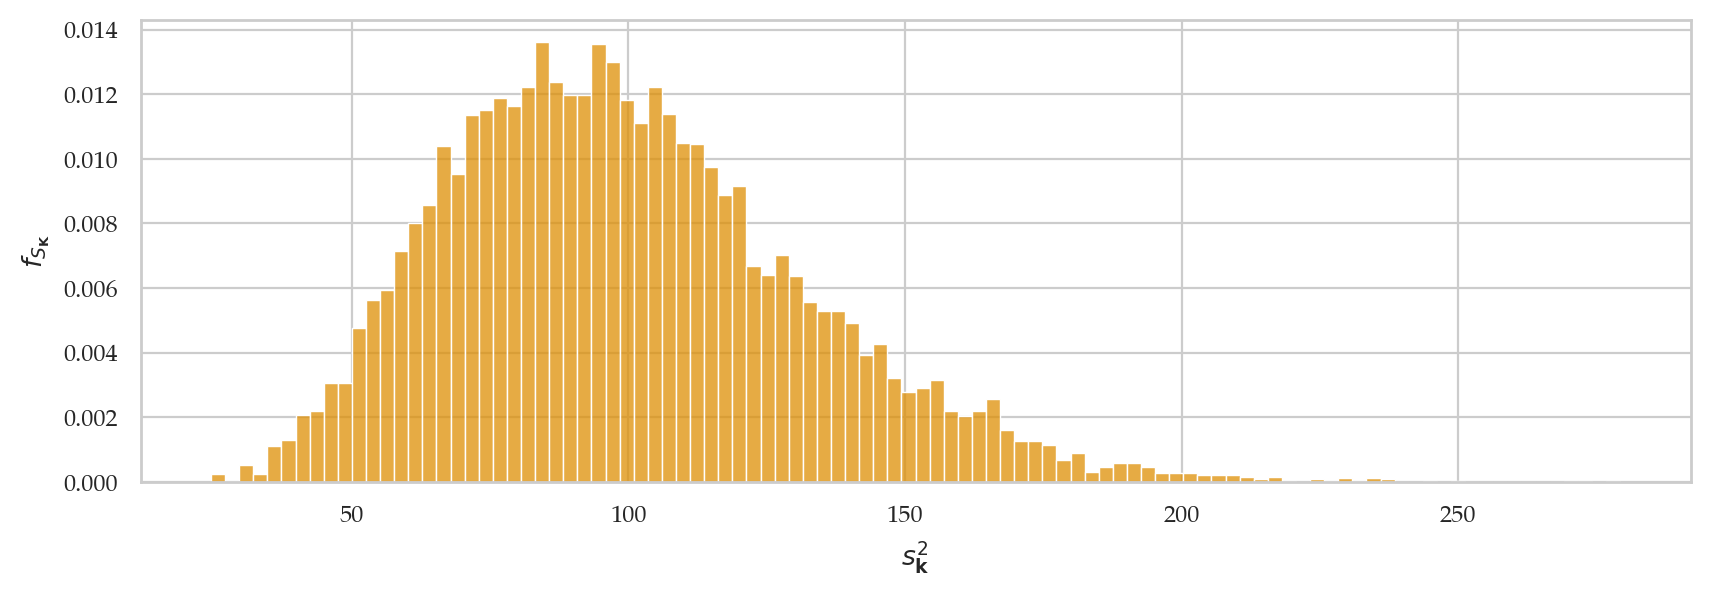

In [42]:
np.random.seed(44)
kvars20 = gen_sampling_dist(rvK, estfunc=var, n=20)
ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
ax.set_ylabel(r"$f_{S_{\mathbf{K}}}$")
ax.set_xlabel(r"$s^2_{\mathbf{k}}$");

The sample variance estimator is unbiased

In [43]:
# observed          # population var    
np.mean(kvars20),   sigmaK**2

(99.39922540353122, 100)

## Approximating sampling distribution

Let's look at a particular sample `ksample02` that comes from Batch 02 of the kombucha bottling plant.

In [44]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]
# ksample02

In [45]:
ksample02.count()

20

In [46]:
ksample02.values

array([ 995.83,  999.44,  978.64, 1016.4 ,  982.07,  991.58, 1005.03,
        987.55,  989.42,  990.91, 1005.51, 1022.92, 1000.42,  988.82,
       1005.39,  994.04,  999.81, 1011.75,  992.52, 1000.09])

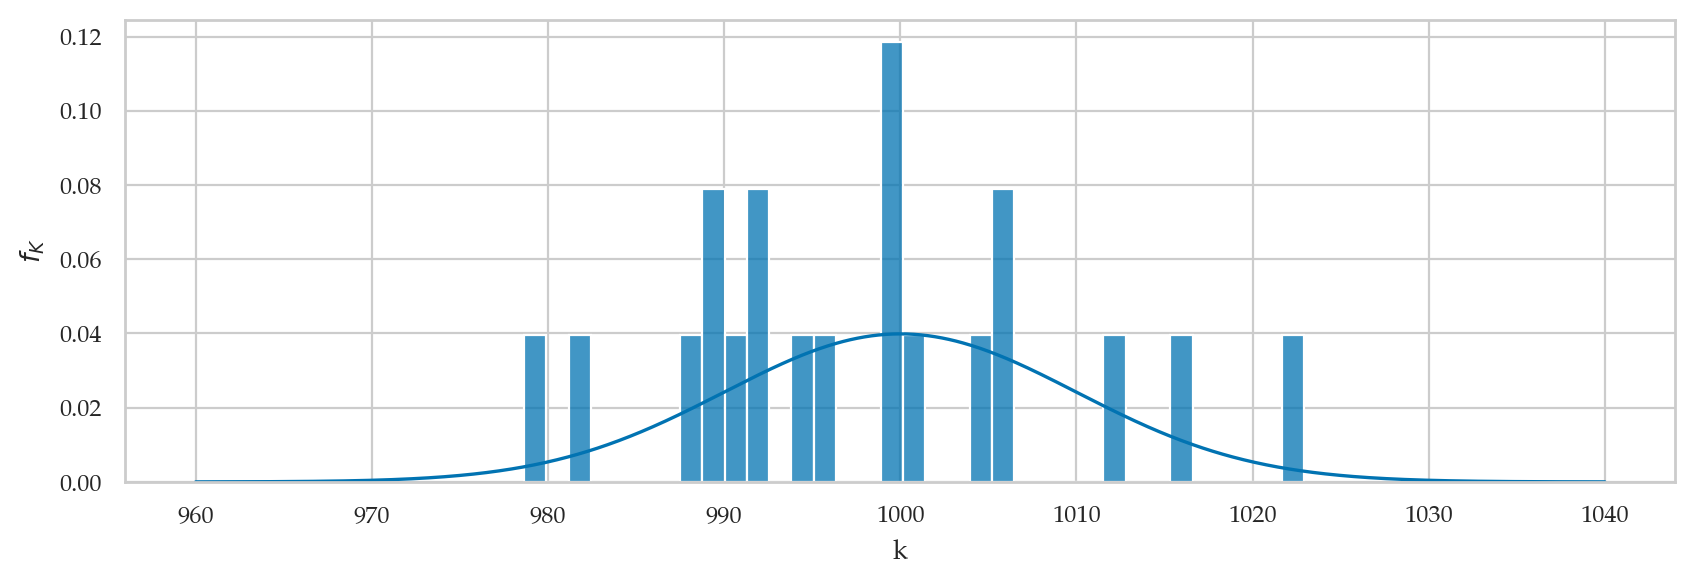

In [47]:
ax = plot_pdf(rvK, xlims=[960,1040], rv_name="K")
sns.histplot(ksample02, ax=ax, stat="density", bins=35);

In [48]:
mean(ksample02)

997.9069999999999

In [49]:
std(ksample02)

11.149780314097287

### Bootstrap estimation

#### Minimal example

In [50]:
# one sample of observations
xsample = [1, 2, 3, 4]

In [51]:
# one bootstrap observation
np.random.seed(42)
bx = np.random.choice(xsample)
bx

3

In [52]:
# bootstrap sample
np.random.seed(42)  # comment this line to generate new bootstrap samples
bsample = np.random.choice(xsample, size=len(xsample))
bsample

array([3, 4, 1, 3])

#### Interactive bootstrap samples example

Re-run the following code cell many times to see different bootstrap samples from `ksample02`.

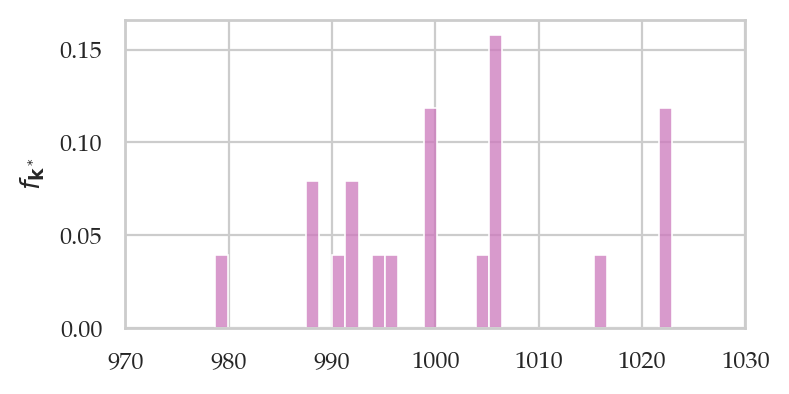

In [53]:
# generate new bootstrap sample
bksample02 = np.random.choice(ksample02, size=len(ksample02))

# plot a histogram of bksample02
with plt.rc_context({"figure.figsize":(4,2)}):
    ax = sns.histplot(bksample02, stat="density", bins=35, color=purple)
    ax.set_xlim([970,1030])
    ax.set_ylabel(r"$f_{\mathbf{k}^*}$")

#### General-purpose bootstrap estimation function

In [54]:
def gen_boot_dist(sample, estfunc, B=5000):
    """
    Generate estimates from the sampling distribiton of the estimator `estfunc`
    based on `B` bootstrap samples (sampling with replacement) from `sample`.
    """
    n = len(sample)
    bestimates = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bestimate = estfunc(bsample)
        bestimates.append(bestimate)
    return bestimates

# ALT.
# from ministats import gen_boot_dist

#### Example 6

Let's use the function `gen_boot_dist` to obtain the sampling distribution of the mean from the sample `ksample02`.

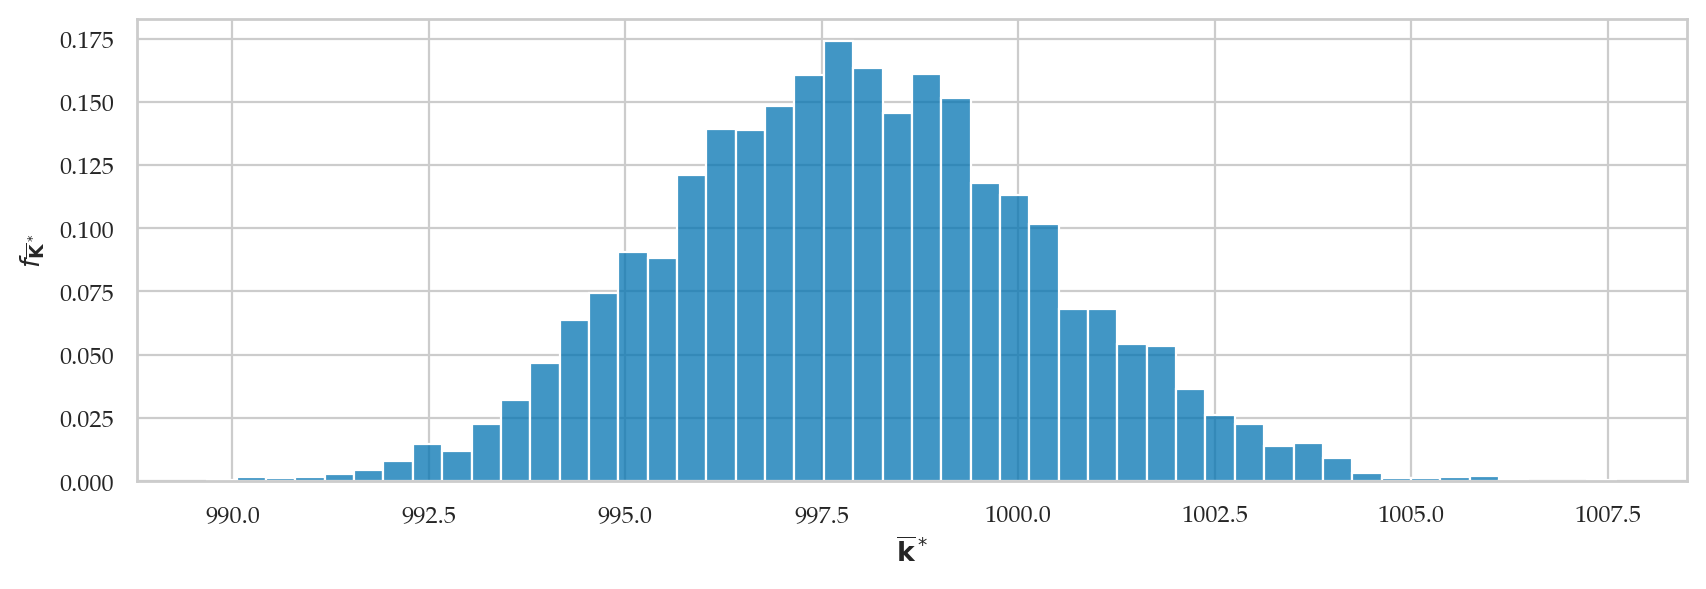

In [55]:
np.random.seed(42)
kbars_boot = gen_boot_dist(ksample02, estfunc=mean)
ax = sns.histplot(kbars_boot, stat="density")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}^*}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}^*$");

We can obtain an bootstrap estimate of standard error of the mean by computing the 
standard deviation of the bootstrap distribution.

In [56]:
# bootstrap est.    # simulation
np.std(kbars_boot), np.std(kbars20)

(2.415083743362255, 2.2080598530804387)

The expected value of the bootstrap distribution matches the sample mean.

In [57]:
# E[bootstrap means]  # sample mean    # population 
np.mean(kbars_boot),  mean(ksample02), muK

(997.9296855999999, 997.9069999999999, 1000)

### Analytical approximation formulas

We can use probability theory formulas to come up with approximations
for certain sampling distributions.

Indeed many of the probability distributions we learned about in the probability chapter are used to describe sampling distributions of various estimators:

- The normal distribution
- Student's $t$-distribution: sample mean from a normally distributed population with unknown variance
- Chi-square distribution: variance of samples from a normal population
- Fisher–Snedecor $F$-distribution: ratios of variances (only discussed later in the book)

The best example of the analytical approximation formula is the central limit theorem.

#### Central limit theorem

In [58]:
# standard error of the mean
seKbar = sigmaK / np.sqrt(20)

# CLT prediction   # simulation
seKbar,            np.std(kbars20)

(2.23606797749979, 2.2080598530804387)

In [59]:
# CLT approx
from scipy.stats import norm
rvKbarCLT = norm(loc=muK, scale=seKbar)

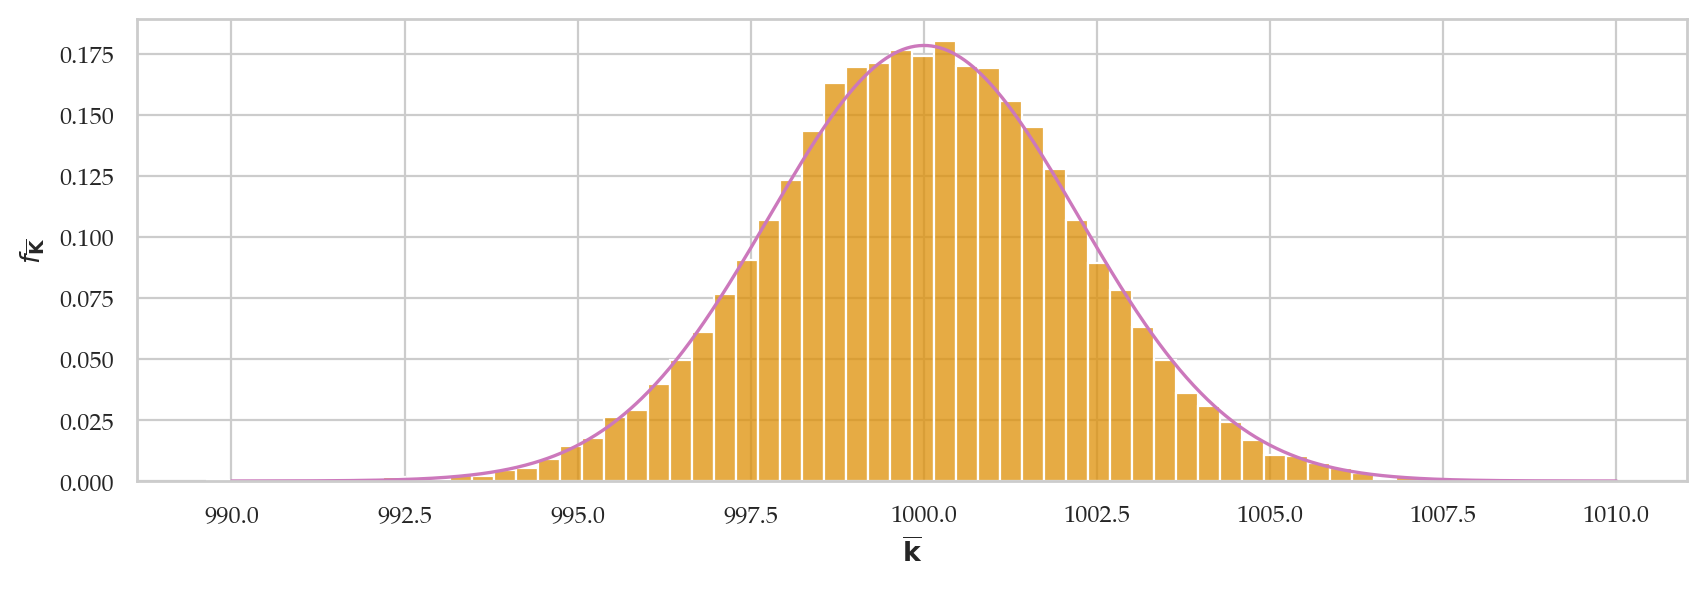

In [60]:
# kbars20 (repeat)
np.random.seed(43)
kbars20 = gen_sampling_dist(rvK, estfunc=mean, n=20)

# plot hist and pdf superimposed
ax = sns.histplot(kbars20, stat="density", bins=60, color=orange)
plot_pdf(rvKbarCLT, ax=ax, xlims=[990,1010], color="m")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$");

## Sampling distribution of the mean

The central limit theorem tells us everything we need to know about the sampling distribution of the sample mean estimator $\Mean$,
which corresponds to the random variable $\overline{\mathbf{X}} = \Mean(\mathbf{X})$.

The central limit theorem states that the sampling distribution of the mean 
converges to a normal distribution as $n$ goes to infinity:

$$
    \overline{\mathbf{X}}
    \quad \sim \quad
    \mathcal{N}\big(\mu_X, \tfrac{\sigma_X}{\sqrt{n}} \big).
$$

Note the central limit theorem gives a sampling distribution of the sample mean
computed from samples taken from **any** population $X \sim \mathcal{M}(\theta)$.

### True sampling distribution

We start by running a simulation to obtain the true sampling distribution of the sample mean
for samples of size $n=7$ from the population $K \sim \mathcal{N}(\mu_K=1000,\sigma_K=10)$.

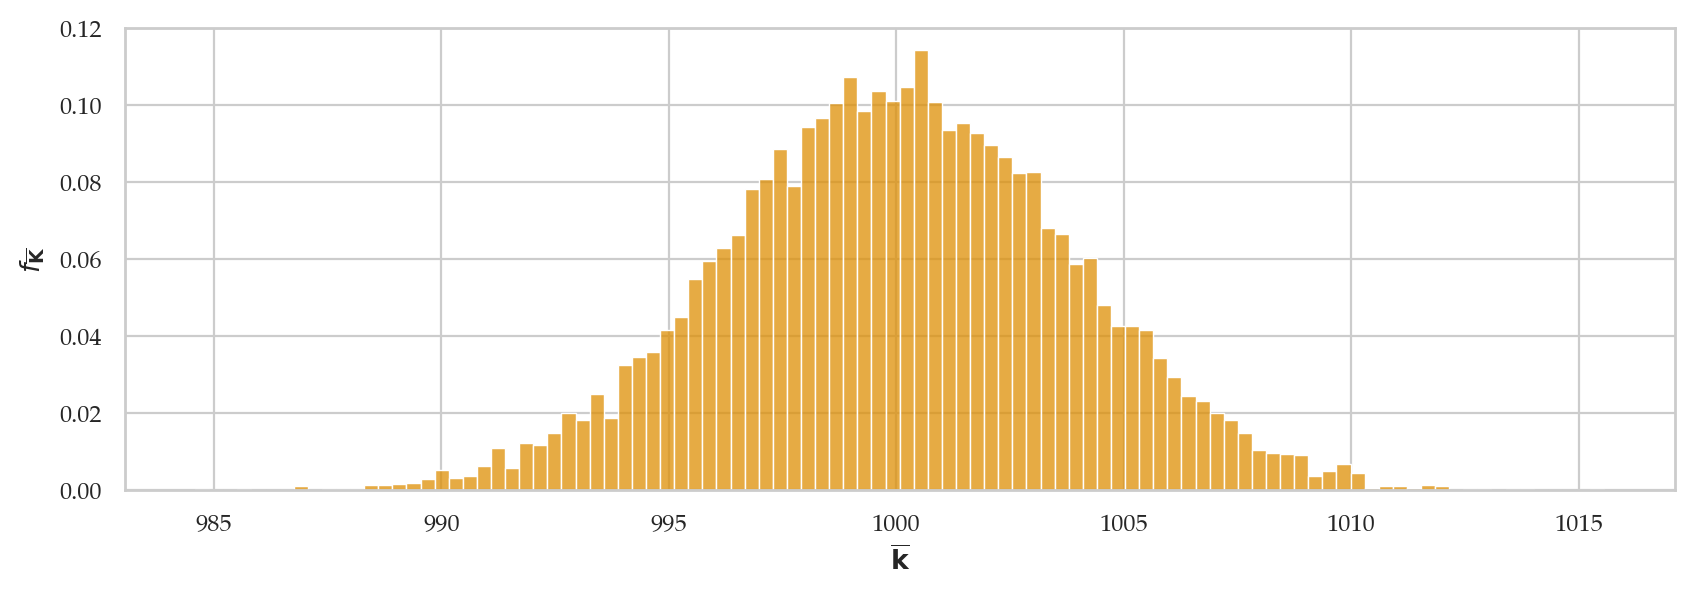

In [61]:
np.random.seed(43)
kbars7 = gen_sampling_dist(rvK, estfunc=mean, n=7)
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$");

This is the true sampling distribution of the sample mean generated using simulation
from $N=10000$ samples of size $n=7$. We can use this graph as the "ground truth" for the approximations techniques we'll learn next.

In [62]:
np.std(kbars7)

3.8051688517483897

### Prediction of the central limit theorem

Compute the standard error using according to the central limit theorem
$\stderr{\overline{\mathbf{k}}} = \frac{\sigma_K}{\sqrt{n}}$:

In [63]:
seKbar = rvK.std() / np.sqrt(7)
seKbar

3.779644730092272

Sampling distribution of the mean according to CLT

In [64]:
rvKbarCLT = norm(loc=muK, scale=seKbar)

Let's now superimpose a lineplot of the analytical approximation formula
we obtain from the central limit theorem.

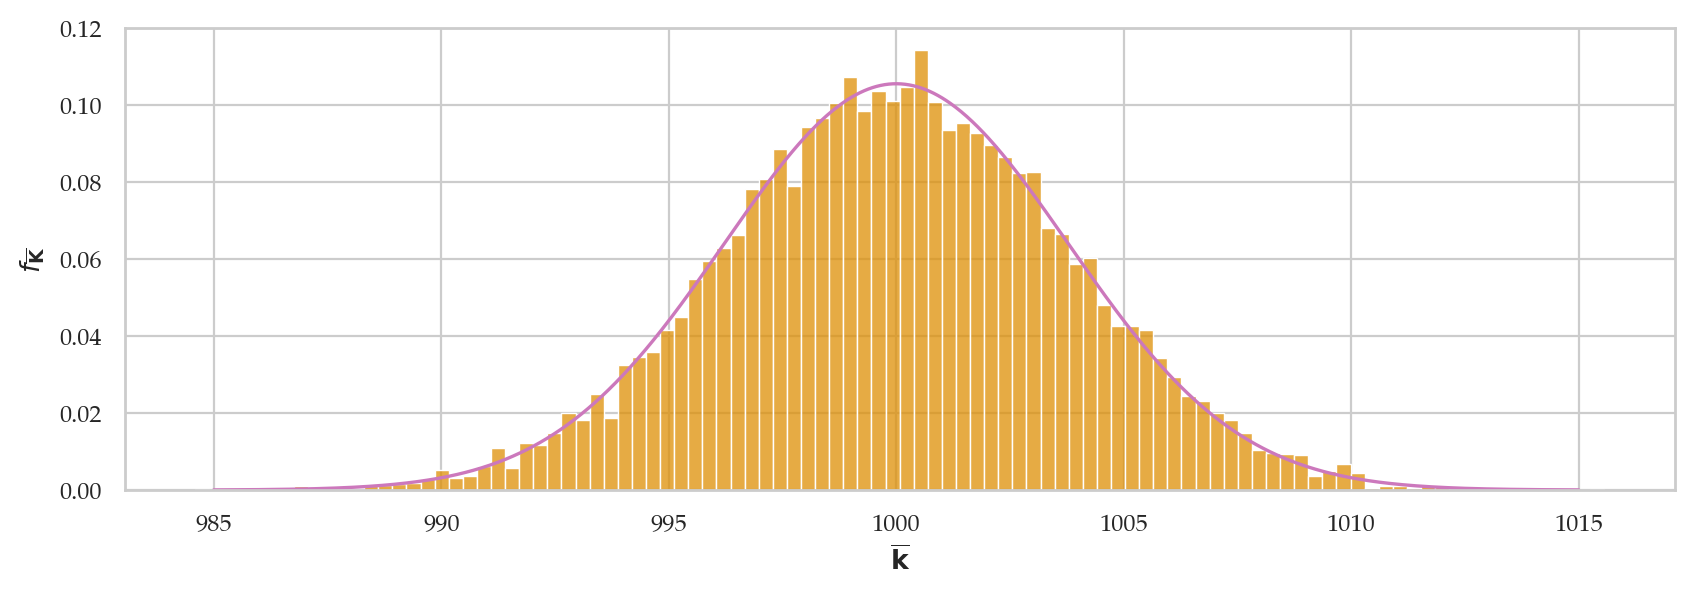

In [65]:
# plot hist and pdf superimposed
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
plot_pdf(rvKbarCLT, ax=ax, xlims=[985,1015], color="m")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$");

### The plug-in principle

Next we consider real-world statistical analysis scenario
when we don't know the population variance,
but instead have to estimate it from a particular sample of observations.
Specifically,
we'll load the sample form Batch 03.

In [66]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch03 = kombucha[kombucha["batch"]==3]
ksample03 = batch03["volume"]
ksample03.values

array([1005.19,  987.31, 1002.4 ,  991.96, 1000.17, 1003.94, 1012.79])

In [67]:
ksample03.count()

7

The estimated standard deviation $s_{\mathbf{k}}$ computed from `ksample03` is:

In [68]:
std(ksample03)

8.519494731273129

This estimate is pretty close to the true population standard deviation
`sigmaK` $= \sigma_K = 10$.

Let's now compute the estimated standard error using the plug-in formula:
$\stderrhat{\overline{\mathbf{k}}} = \frac{s_{\mathbf{k}}}{\sqrt{n}}$,
where $s_{\mathbf{k}}$ is the estimated standard deviation computed from `ksample03`.

In [69]:
sehat03 = std(ksample03) / np.sqrt(7)
sehat03

3.220066336410536

This is pretty close to the standard error
we would obtain if we knew the population standard deviation:
$\stderr{\overline{\mathbf{k}}} = \frac{\sigma_K}{\sqrt{n}} = $ `sigmaK/np.sqrt(7)` = 3.78.

### Normal approximation to the sampling distribution

We now obtain the best normal approximation based on the estimated standard error `sehat03`
that we computed from the data in `ksample03`.

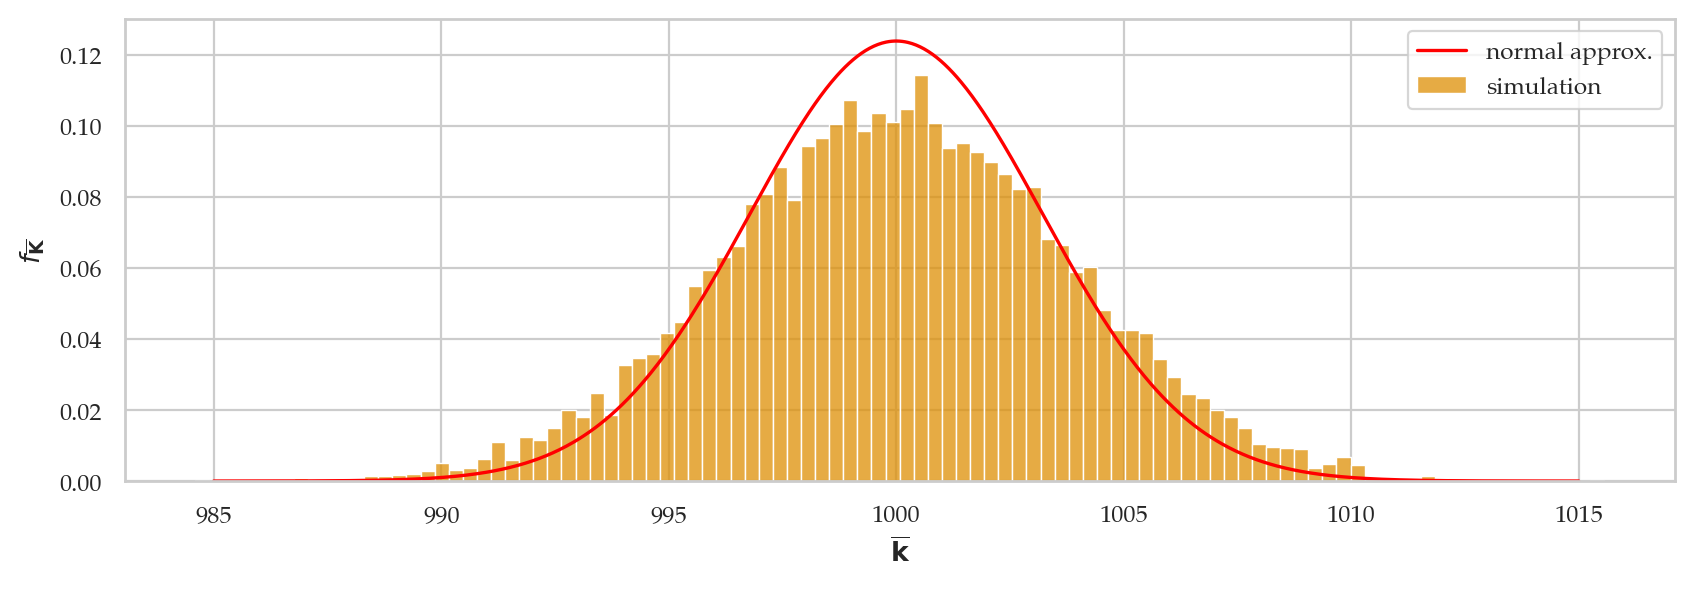

In [70]:
rvNKbar = norm(loc=muK, scale=sehat03)

ax = sns.histplot(kbars7, stat="density", bins=100, color=orange, label="simulation")
plot_pdf(rvNKbar, ax=ax, xlims=[985,1015], color="red", label="normal approx.")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$");

### A better approximation

Student's t-distribution (used whenever working with normally needed in context where using $s$ as plug-in estimate for σ).

Obtain Student's $t$-distribution based on the estimated standard error `sehat03`
that we computed from the data in `ksample03`.

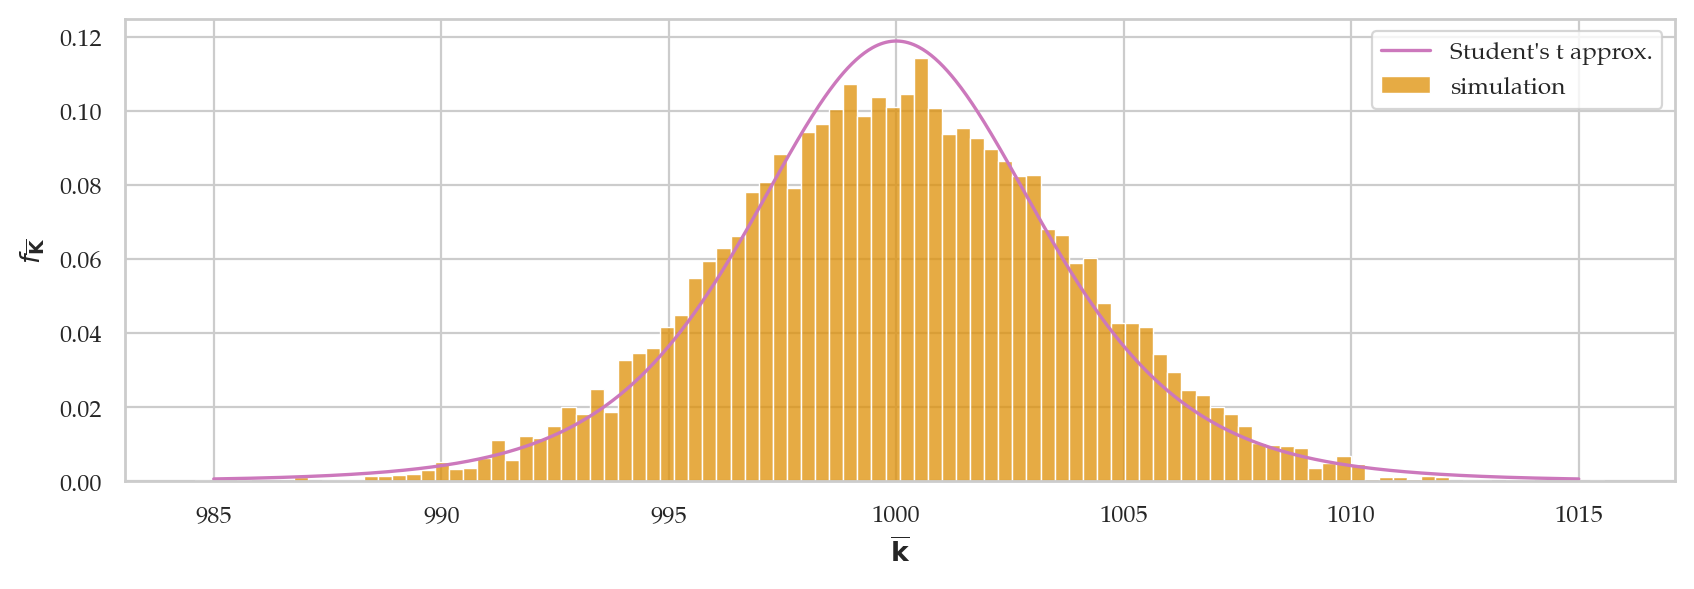

In [71]:
from scipy.stats import t as tdist

df03 = 7 - 1  # degrees of freedom
rvTKbar = tdist(df=df03, loc=muK, scale=sehat03)

ax = sns.histplot(kbars7, stat="density", bins=100, color=orange, label="simulation")
plot_pdf(rvTKbar, ax=ax, xlims=[985,1015], color="m", label="Student's t approx.")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$");

In [72]:
# Student's t       # simulation
rvTKbar.std(),      np.std(kbars7)

(3.943759731059507, 3.8051688517483897)

### Bootstrapped sampling distribution of the sample mean

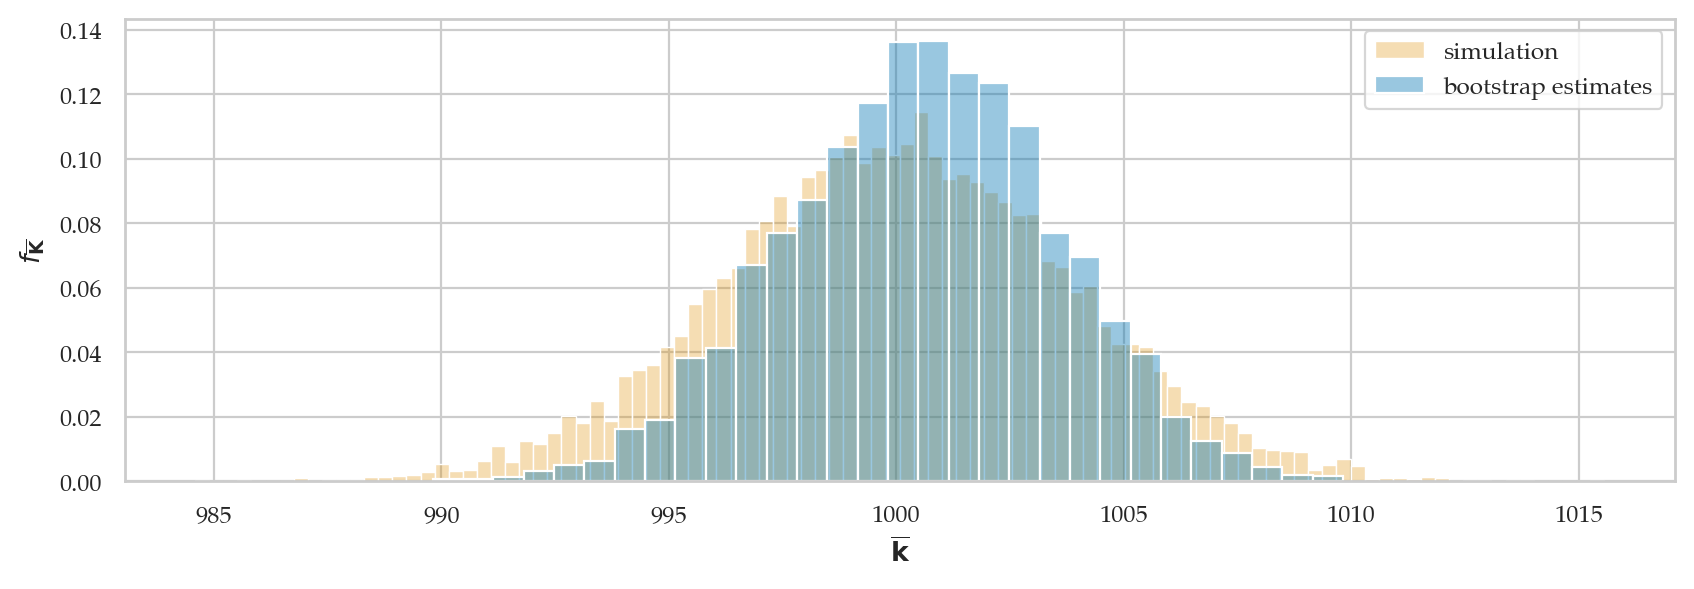

In [73]:
# ground truth (in orange)
ax = sns.histplot(kbars7, stat="density", bins=100,
                  color=orange, alpha=0.3, label="simulation")

# bootstrap estimate (in blue)
np.random.seed(48)
kbars_boot03 = gen_boot_dist(ksample03, estfunc=mean)
sns.histplot(kbars_boot03, ax=ax, stat="density", bins=30,
             alpha=0.4, label="bootstrap estimates")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$")
plt.legend();

The expected value of the sampling distribution
we obtained using bootstrap estimation is

In [74]:
# E[bootstrap dist.]   # sample mean     # population mean
np.mean(kbars_boot03), mean(ksample03),  muK

(1000.5607797142856, 1000.5371428571428, 1000)

The standard error of the sampling distribution

In [75]:
# bootstrap est.      # simulation
np.std(kbars_boot03), np.std(kbars7)

(2.9673068567038365, 3.8051688517483897)

In [76]:
# sample std        # population std
std(ksample03),     sigmaK

(8.519494731273129, 10)

## Sampling distribution of the variance

When the population is normally distributed $X \sim \mathcal{N}(\mu,\sigma)$,
the sampling distribution of the sample variance $S_{\mathbf{x}}^2$
is described by a scaled version of the chi-square distribution:

$$
    S_{\mathbf{x}}^2
    \;\; \sim \;\;
    \underbrace{\frac{ \sigma^2 }{ (n-1) } }_{\tt{scale}} \; \cdot \; \chi^2_{(n-1)},
$$

where $n$ is the sample size and $\chi^2_{(n-1)}$ is the chi-square distribution with $n-1$ degrees of freedom.

### Sampling distribution of the variance

Let's start by plotting a histogram of the sampling distribution of the variance
computed from samples of size $n=20$ from the random variable `rvK` = $K \sim \mathcal{N}(\mu_K=1000,\sigma_K=10)$.

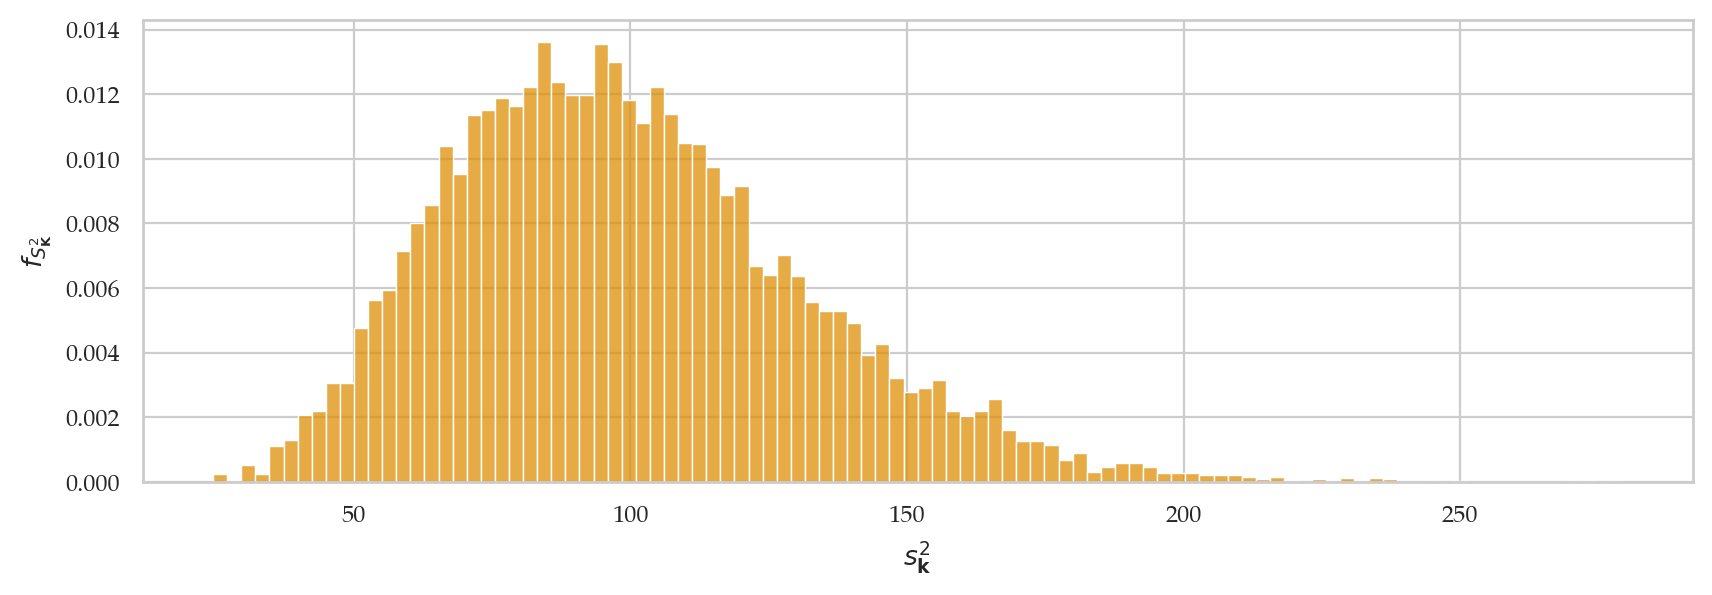

In [77]:
np.random.seed(44)
kvars20 = gen_sampling_dist(rvK, estfunc=var, n=20)
ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
ax.set_ylabel(r"$f_{S^2_{\mathbf{K}}}$")
ax.set_xlabel(r"$s^2_{\mathbf{k}}$");

Let's now superimpose the chi-square distribution with $20-1=19$ degrees of freedom,
with scale parameter set to $\sigma_N^2/(n-1)$.

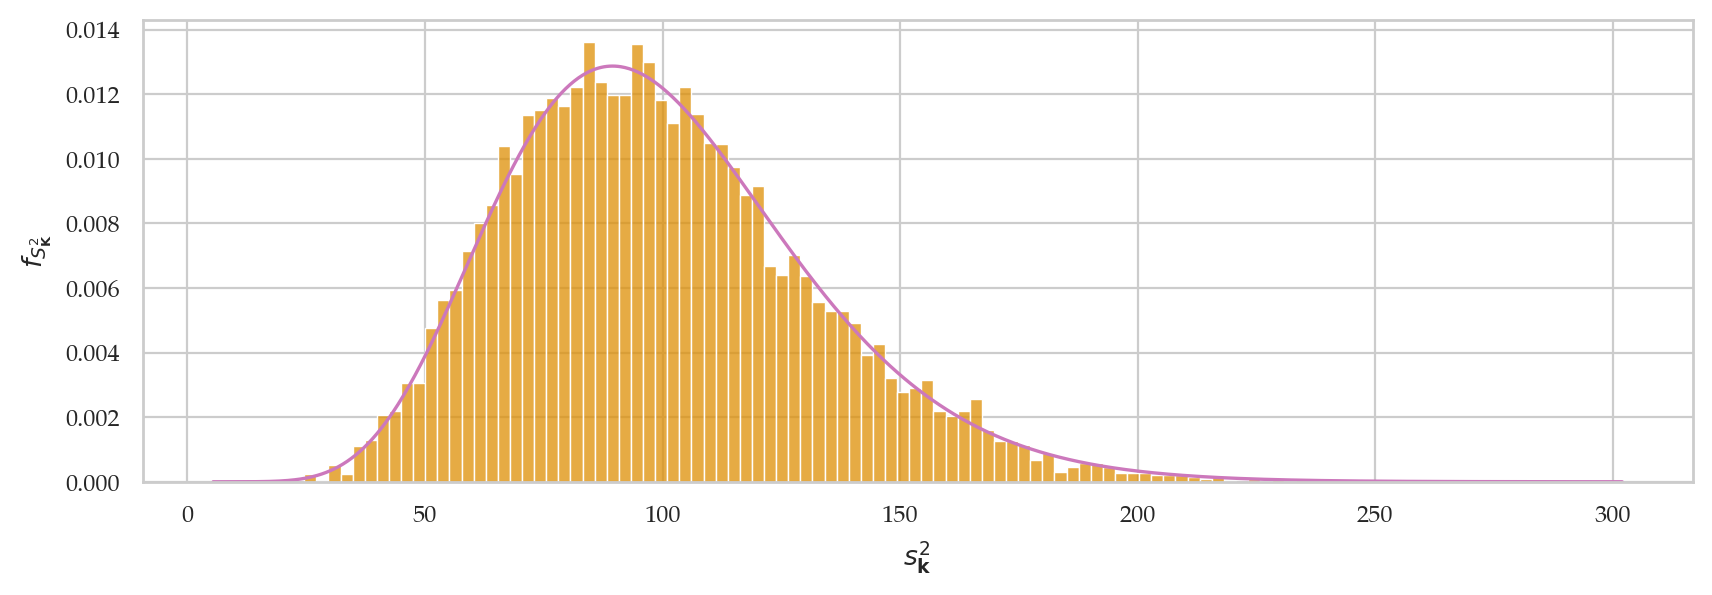

In [78]:
from scipy.stats import chi2

scale = sigmaK**2 / (20-1)
rvS2 = chi2(df=20-1, scale=scale)

ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
plot_pdf(rvS2, ax=ax, color="m")
ax.set_ylabel(r"$f_{S^2_{\mathbf{K}}}$")
ax.set_xlabel(r"$s^2_{\mathbf{k}}$");

### Bootstrapped sampling distribution of the sample variance

Let's look again at the sample `ksample02` that comes from Batch 02 of the kombucha bottling plant.

In [79]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]
ksample02.count()

20

The sample variance we find from `ksample02` is an over-estimate
of the population variance:

In [80]:
# sample var         # population var
var(ksample02),      sigmaK**2

(124.31760105263139, 100)

So we should expect the bootstrap estimate we obtain
by resampling from `ksample02` will also be an overestimate of the population.

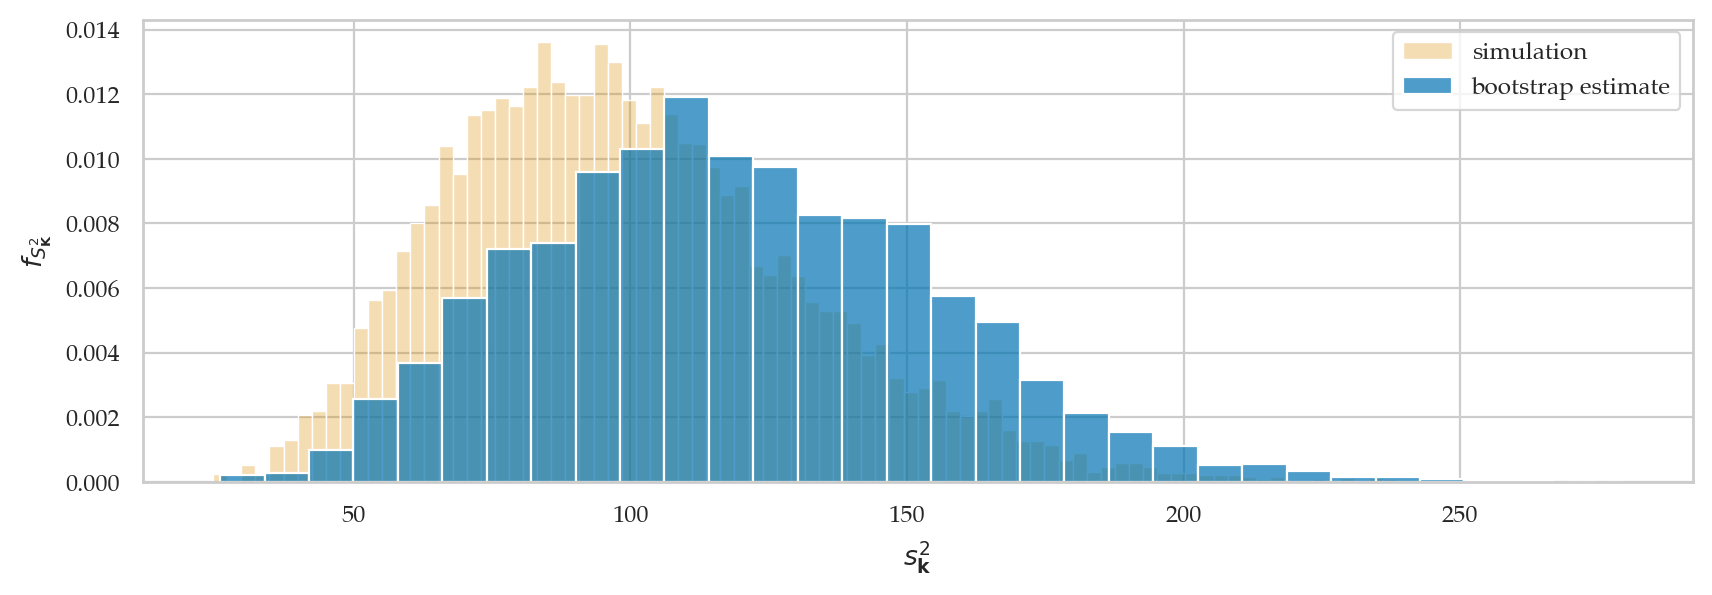

In [81]:
# ground truth (in orange)
ax = sns.histplot(kvars20, stat="density", bins=100,
                  color=orange, alpha=0.3, label="simulation")

np.random.seed(49)
kvars_boot02 = gen_boot_dist(ksample02, estfunc=var)

# bootstrap estimate (in blue)
ax = sns.histplot(kvars_boot02, ax=ax, stat="density", bins=30,
                  alpha=0.7, label="bootstrap estimate")
ax.set_ylabel(r"$f_{S^2_{\mathbf{K}}}$")
ax.set_xlabel(r"$s^2_{\mathbf{k}}$")
plt.legend();

The expected value the sampling distribution we obtained using bootstrap estimation is:

In [82]:
# E[bootstrap vars]     # population variance
np.mean(kvars_boot02),  sigmaK**2

(118.6780201503156, 100)

The expected value bootstrap variances overestimates the true population variance.

We can also compute standard error of the sampling distribution of the variance, denoted $\stderrhat{s_{\mathbf{k}}^2}^*$,
and compare it to the true standard error $\stderr{s_{\mathbf{k}}^2}$ computed through simulation:

In [83]:
# bootstrap est.        # simulated
np.std(kvars_boot02),   np.std(kvars20)

(35.96396081594617, 32.27334227853393)

## Difference between means estimator


We assume the two groups are normally distributed random variables $X$ and $Y$:

$$ 
X \sim \mathcal{N}\!\left(\mu_X, \sigma_X \right)
\qquad
\textrm{and}
\qquad
Y \sim \mathcal{N}\!\left(\mu_Y, \sigma_Y \right).
$$

Definitions:

- $\mathbf{x} = (x_1, x_2, \ldots, x_{n})$=`xsample`: a sample of size $n$ from $X$
- $\mathbf{y} = (y_1, y_2, \ldots, y_{m})$=`ysample`: a sample of size $m$ from $Y$.
- $\overline{\mathbf{x}} = \Mean(\mathbf{x})$: the observed mean in the first group
- $\overline{\mathbf{y}} = \Mean(\mathbf{y})$: the observed mean in the second group
- $s_{\mathbf{x}}^2 = \Var(\mathbf{x})$: the sample variance from the first group
- $s_{\mathbf{y}}^2 = \Var(\mathbf{y})$: the sample variance from the second group
- $\hat{d} = \DMeans(\mathbf{x}, \mathbf{y}) = \overline{\mathbf{x}} - \overline{\mathbf{y}}$:
  the difference between means estimate,
  which is an estimate of the true different between
  population means $\Delta = \mu_X - \mu_Y$.


The sampling distribution of the estimator `dmeans` is defined as:

$$
  \hat{D}
   = \texttt{dmeans}(\mathbf{X}, \mathbf{Y})
   = \overline{\mathbf{X}} - \overline{\mathbf{Y}},
$$

where $\mathbf{X} = (X_1, X_2, \ldots, X_{n})$
and $\mathbf{Y} = (Y_1, Y_2, \ldots, Y_{m})$
are random samples.

<!--
If we know the population distributions for the two groups $X$ and $Y$,
we can obtain the sampling distribution
by repeatedly generating samples `xsample` and `ysample` from the two distributions,
and computing `dmeans` on the random samples. -->

### Analytical formula for the sampling distribution

Let's now use probability theory to build a theoretical model for the sampling distribution of the difference-between-means estimator `dmeans`.

- The central limit theorem tells us the sample mean within the two group are

  $$
  \overline{\mathbf{X}} \sim \mathcal{N}\!\left(\mu_X, \tfrac{\sigma_X}{\sqrt{n}} \right)
  \qquad \textrm{and} \qquad
  \overline{\mathbf{Y}} \sim \mathcal{N}\!\left(\mu_Y, \tfrac{\sigma_Y}{\sqrt{m}} \right).
  $$

- The rules of probability theory tells us that the [difference of two normal random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables) requires subtracting their means and adding their variance, so we get:
  $$
  \hat{D}
    \sim
    \mathcal{N}\!\left(
        \mu_X - \mu_Y, \;
        \stderr{\hat{D}}
    \right),
  $$
  
  where the standard error of the estimator $\hat{D}$ is:

  $$ 
    \stderr{\hat{D}} = \sqrt{ \tfrac{\sigma^2_X}{n} + \tfrac{\sigma^2_Y}{m}  }.
  $$


#### Approximation using Student's $t$-distribution

Recall the plug-in principle allows us to obtain approximate statistical
formulas by replacing population parameters with estimates computed from
samples. Applying the plug-in principle to the formula
$\stderr{\hat{d}}$, we obtain a formula for the estimated standard error
of the difference between means estimator:
$$
\stderrhat{\hat{d}} = \sqrt{ \frac{s_{\mathbf{x}}^2}{n} + \frac{s_{\mathbf{y}}^2}{m} }
                = \sqrt{  \stderrhat{\overline{\mathbf{x}}}^2 + \stderrhat{\overline{\mathbf{y}}}^2 }\;.
$$

We can now build a model for the sampling distribution of the difference
between means estimator based on Student's $t$-distribution:

$$
T_{\widehat{D}}
 \;\; \sim \;\;
 \mathcal{T}(\nu_d, \; \tt{loc}\!=\!\Delta, \; \tt{scale}\!=\!\stderrhat{\hat{d}})
 \; = \;
 \stderrhat{\hat{d}} \cdot \mathcal{T}(\nu_d) \; + \; \Delta,
$$
where $\mathcal{T}(\nu_d)$ is Student's $t$-distribution with
$\nu_d$ degrees of freedom. 

The degrees of freedom of is obtained by the following formula
  $$
  \nu_d
    \;\; = \;\;
    \frac{ (\stderrhat{\overline{\mathbf{x}}}^2 + \stderrhat{\overline{\mathbf{y}}}^2)^2 }
        { \frac{\stderrhat{\overline{\mathbf{x}}}^4}{n-1}
        +   \frac{\stderrhat{\overline{\mathbf{y}}}^4}{m-1}	}\;.
  $$

Let's write a Python function that calculates the degrees of freedom parameter.

In [84]:
def calcdf(stdX, n, stdY, m):
    vX = stdX**2 / n
    vY = stdY**2 / m
    df = (vX + vY)**2 / (vX**2/(n-1) + vY**2/(m-1))
    return df

# ALT.
# from ministats import calcdf

### Example 7: difference between electricity prices

Let's return to Bob's dataset of electricity prices collected from
charging stations in the East and West parts of his city. We'll assume
the prices in the two parts of the city are normally distributed and
described by the models $X_W \sim \mathcal{N}(\mu_W, \sigma_W)$ and
$X_E \sim \mathcal{N}(\mu_E, \sigma_E)$.

We have two samples $\tt{pricesW} = \mathbf{x}_W$ and
$\tt{pricesE} = \mathbf{x}_E$ from these prices

In [85]:
eprices = pd.read_csv("../datasets/eprices.csv")
pricesW = eprices[eprices["loc"]=="West"]["price"]
pricesE = eprices[eprices["loc"]=="East"]["price"]

In [86]:
mean(pricesW), mean(pricesE)

(9.155555555555557, 6.155555555555555)

In [87]:
dhat = dmeans(pricesW, pricesE)
dhat

3.0000000000000018

In [88]:
# std and sample size in the East
stdW, nW = pricesW.std(), pricesW.count()

# std and sample size in the West
stdE, nE = pricesE.std(), pricesE.count()

stdW, nW, stdE, nE

(1.5621388471508475, 9, 0.8776547030454391, 9)

In [89]:
seD = np.sqrt(stdW**2/nW + stdE**2/nE)
seD

0.5972674401486562

In [90]:
dfD = calcdf(stdW, nW, stdE, nE)
dfD

12.59281702723103

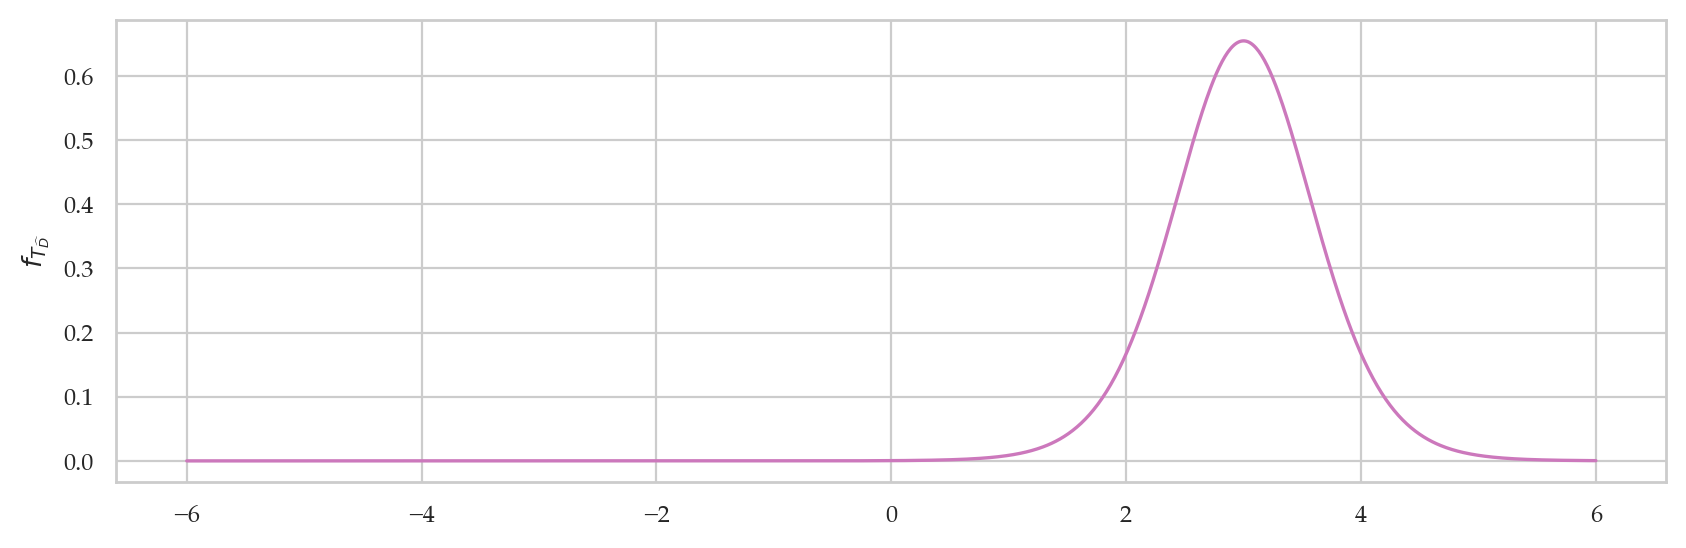

In [91]:
from scipy.stats import t as tdist
rvTDhat = tdist(df=dfD, loc=dhat, scale=seD)
ax = plot_pdf(rvTDhat, rv_name="D", xlims=[-6,6], color="m")
ax.set_ylabel(r"$f_{T_{\widehat{D}}}$")
ax.set_xlabel(None);

#### Bootstrapped sampling distribution of the difference between means

First compute bootstrap estimates for mean in each group

In [92]:
xbarsW_boot = gen_boot_dist(pricesW, estfunc=mean)
xbarsE_boot = gen_boot_dist(pricesE, estfunc=mean)

Next we compute the difference between means from bootstrap samples

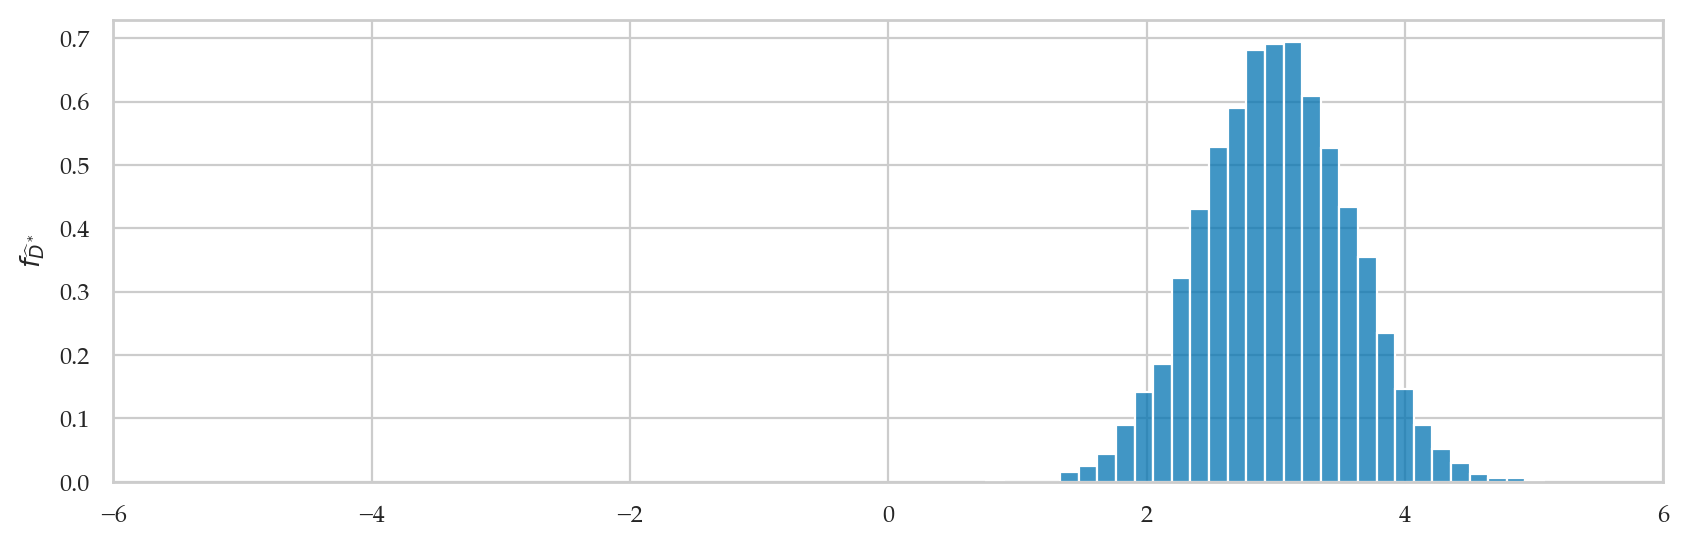

In [93]:
dhats_boot = np.subtract(xbarsW_boot, xbarsE_boot)

ax = sns.histplot(dhats_boot, stat="density", bins=30)
ax.set_xlim([-6,6])
# ax.set_xlabel("$\hat{d}$")
ax.set_ylabel(r"$f_{\widehat{D}^*}$");

We can obtain the bootstrap estimate of the standard error $\stderrhat{\hat{d}}^*$
by calculating the standard deviation of the bootstrap distribution.

In [94]:
np.std(dhats_boot)

0.5629952099614226

Note this value is very similar to the value $\stderrhat{\hat{d}}=0.598$ that we obtained
from the analytical approximation formula.
This shows that the bootstrap procedure is a viable alternative to the calculation based on analytical approximations.

## Alternative calculation methods

### Using `statsmodels` for bootstrap estimation

#### Bootstrap mean

5000

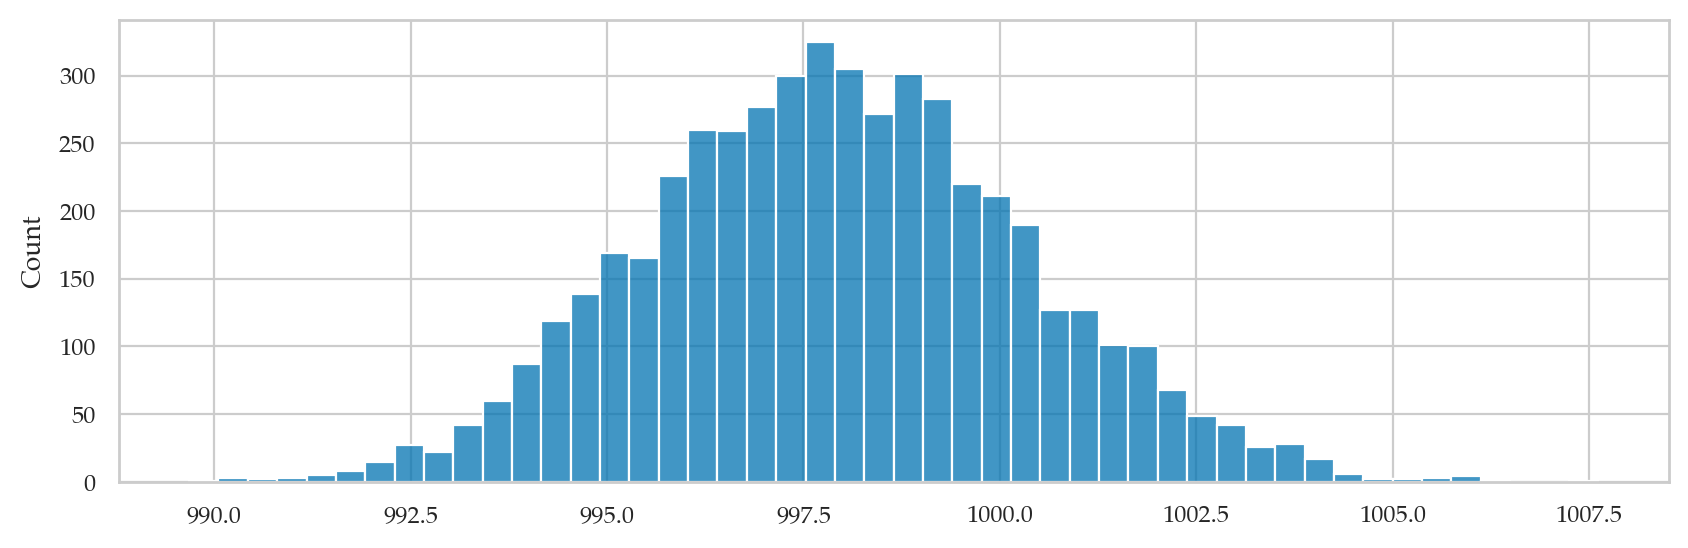

In [95]:
from scipy.stats import bootstrap

np.random.seed(42)
res = bootstrap([ksample02], statistic=mean,
                n_resamples=5000, vectorized=False)
sns.histplot(res.bootstrap_distribution)
len(res.bootstrap_distribution)

We can obtain bootstrap distribution of the variance
by simply changing the argument `statistic=var`.
See Exercise E3.16.

#### Bootstrap difference between mean

5000

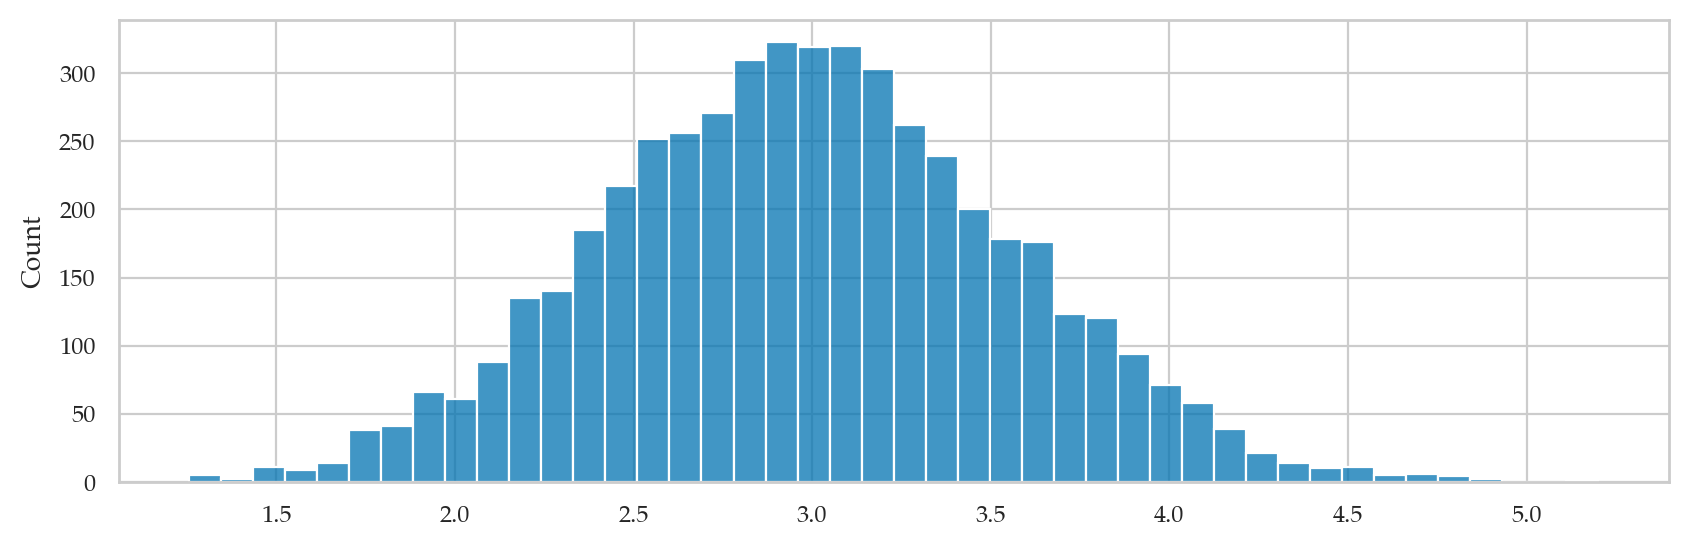

In [96]:
# two-sample test `scipy.stats`
from scipy.stats import bootstrap

np.random.seed(42)
res2 = bootstrap([pricesW, pricesE], statistic=dmeans,
                n_resamples=5000, vectorized=False)
sns.histplot(res2.bootstrap_distribution)
len(res2.bootstrap_distribution)

## Explanations

### Biased and unbiased estimators for the population variance

The sample variance estimator 
$s_{\mathbf{x}}^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{\mathbf{x}})^2$
is an *unbiased* estimator of the population variance.

Let's see what happens if we the estimator 
$\tilde{s}_{\mathbf{x}}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$,
which has denominator $n$ instead of $(n-1)$.

First, let's define the Python function `altvar` that performs this calculation:

In [97]:
def altvar(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / len(sample)

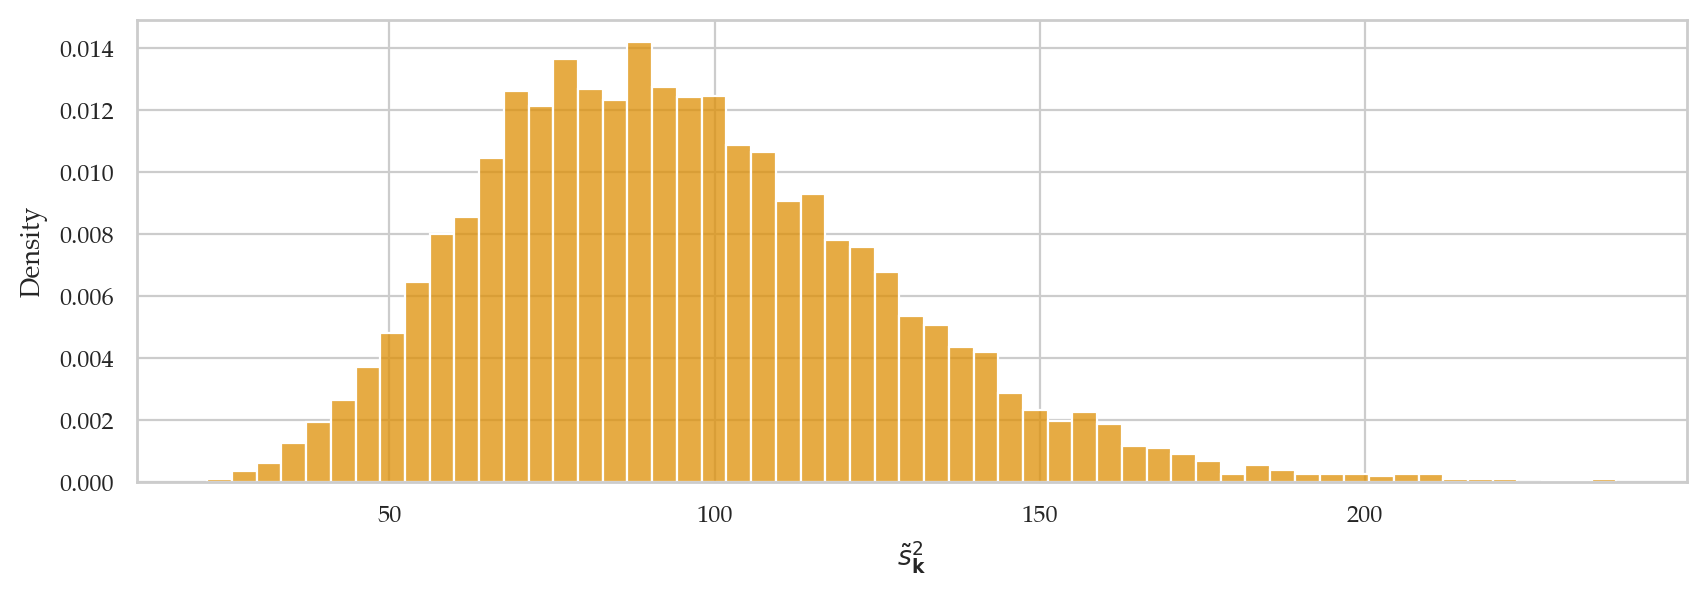

In [98]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

np.random.seed(16)
altvars = gen_sampling_dist(rvK, estfunc=altvar, n=20)
ax = sns.histplot(altvars, stat="density", color=orange)
ax.set_xlabel(r"$\tilde{s}^2_{\mathbf{k}}$");

In [99]:
# E[simulated]     # population var    
np.mean(altvars),  sigmaK**2

(95.28131350335453, 100)

The expected value of the sampling distribution for this estimator does not equal the population variance, $\mathbb{E}[\tilde{S}^2] \neq \sigma_K^2 = 100$.
The expected value $\mathbb{E}[\tilde{S}^2]$ will consistently underestimate $\sigma_K^2$.


We can correct the bias in this estimator by simply using the normalization factor
$(n-1)$ in the formula instead of $n$. This is how we end up with the unbiased estimator
formula $s_{\mathbf{x}}^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{\mathbf{x}})^2$,
for which $\mathbb{E}[S_{\mathbf{K}}^2] \approx \sigma_K^2 = 100$.

In [100]:
np.random.seed(47)
kvars20 = gen_sampling_dist(rvK, estfunc=var, n=20)
# E[simulated]      # population var
np.mean(kvars20),   sigmaK**2

(99.91922831464034, 100)

### Pivotal quantities

Rephrase analytical approximations in terms of standard reference distributions, thanks to pivot transformation 

$$
  Y \;\; = \;\; \texttt{scale} \cdot X \; + \; \texttt{loc}.
$$

$$
  X \;\; = \;\; \frac{ Y - \texttt{loc} }{ \texttt{scale} }
$$

We say $X$ is a pivotal quantity.

$$
 F_Y(y) = F_X\left(  \frac{ y - \texttt{loc} }{ \texttt{scale} }  \right)
 \quad \text{and} \quad
 f_Y(y) = \frac{1}{\texttt{scale}} \cdot f_X\left(\frac{y-\texttt{loc}}{\texttt{scale}} \right).
$$




Recall the distribution for mean of kombucha volume modelled as `rvTKbar`,
and corresponds to the custom $t$-distribution:
$T_{\overline{\mathbf{K}}}
  \;\;\; = \;\;\;
  \stderrhat{\overline{\mathbf{k}}} \cdot \mathcal{T}(6)  \; + \; \mu_K$.

We can also get the same results using the standard $t$-distribution.

In [101]:
from scipy.stats import t as tdist
rvT = tdist(df=7-1)

In [102]:
rvTKbar.ppf(0.95), rvT.ppf(0.95)*sehat03 + muK

(1006.2571694064695, 1006.2571694064695)

In [103]:
rvTKbar.cdf(1003), rvT.cdf( (1003-muK)/sehat03 )

(0.8062670118096588, 0.8062670118096588)

Recall the sampling distribution of the variance `rvS2`
with custom scale parameter.
Here are some examples of how we can do calculations using the un-scaled standard chi-square distribution.

In [104]:
from scipy.stats import chi2
rvX2 = chi2(df=20-1, scale=1)

In [105]:
scale = sigmaK**2 / (20-1)
rvS2.ppf(0.95), rvX2.ppf(0.95)*scale

(158.65014318761138, 158.65014318761138)

In [106]:
rvS2.cdf(150), rvX2.cdf(150/scale)

(0.9257325359937036, 0.9257325359937036)

Recall the sampling distribution of the difference between means `rvTDhat`.
Here are some examples of equivalent calculations using standard $t$-distribution.

In [107]:
dfD = calcdf(stdW, nW, stdE, nE)
rvT = tdist(df=dfD)

In [108]:
rvTDhat.ppf(0.95), rvT.ppf(0.95)*seD + dhat

(4.060342411631856, 4.060342411631856)

In [109]:
rvTDhat.cdf(4), rvT.cdf( (4-dhat)/seD )

(0.9406438830093701, 0.9406438830093701)

### Shifted sampling distributions

Two contexts for using sampling distribution:

-   **Case 1**: the population mean $\mu_X$ is known. We draw the
    sampling distribution centred on the population mean $\mu_X$:
    $$T_B
       \;\; \sim \;\;
       \mathcal{T}(n-1, \;
                   \tt{loc}\!=\mu_X, \;
                   \tt{scale}\!=\!\stderrhat{\overline{\mathbf{x}}}).
    $$

-   **Case 2**: the population mean $\mu_X$ is unknown. We can draw the
    sampling distribution centred on the sample mean
    $\overline{\mathbf{x}}$:
    $$ T_A
       \;\; \sim \;\;
       \mathcal{T}(n-1, \;
                   \tt{loc}\!=\overline{\mathbf{x}}, \;
                   \tt{scale}\!=\!\stderrhat{\overline{\mathbf{x}}}).
    $$


Essentially, the sampling distribution formula we obtained describes the
distribution of the deviations of the sample mean from the population
mean: $\overline{\mathbf{x}} - \mu_X$, so this is why we can use the
same distribution in both contexts.

#### Estimation of the apples weights

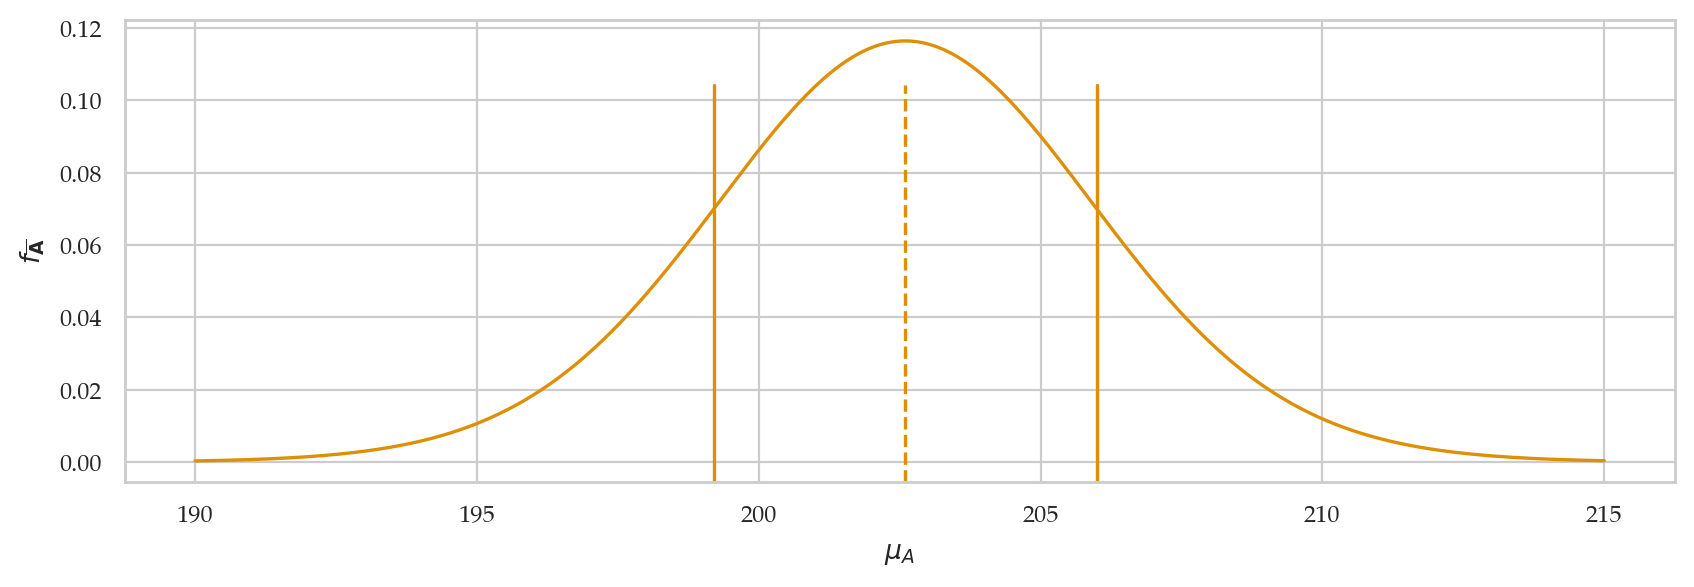

In [110]:
apples = pd.read_csv("../datasets/apples.csv")
asmpale = apples["weight"]
n = asample.count()
abar =  mean(asample)
asehat = std(asample) / np.sqrt(n)

# analytical approx.
from scipy.stats import t as tdist
rvTAbar = tdist(df=n-1, loc=abar, scale=asehat)
ax = plot_pdf(rvTAbar, xlims=[190,215], color=orange)
ax.set_xlabel(r"$\mu_A$")
ax.set_ylabel(r"$f_{\overline{\mathbf{A}}}$")

# sample mean
ax.axvline(abar, ymin=0, ymax=0.86, linestyle="--", color=orange)

# sample mean +/- se
ax.axvline(abar+asehat, ymin=0, ymax=0.86, linestyle="-", color=orange)
ax.axvline(abar-asehat, ymin=0, ymax=0.86, linestyle="-", color=orange);

#### Kombucha volume probabilities

In **Case P** we know the population mean, and the random variable $T_B$
describes what kind of sample means we can expect to observe.
We'll use this type of reasoning for hypothesis testing.

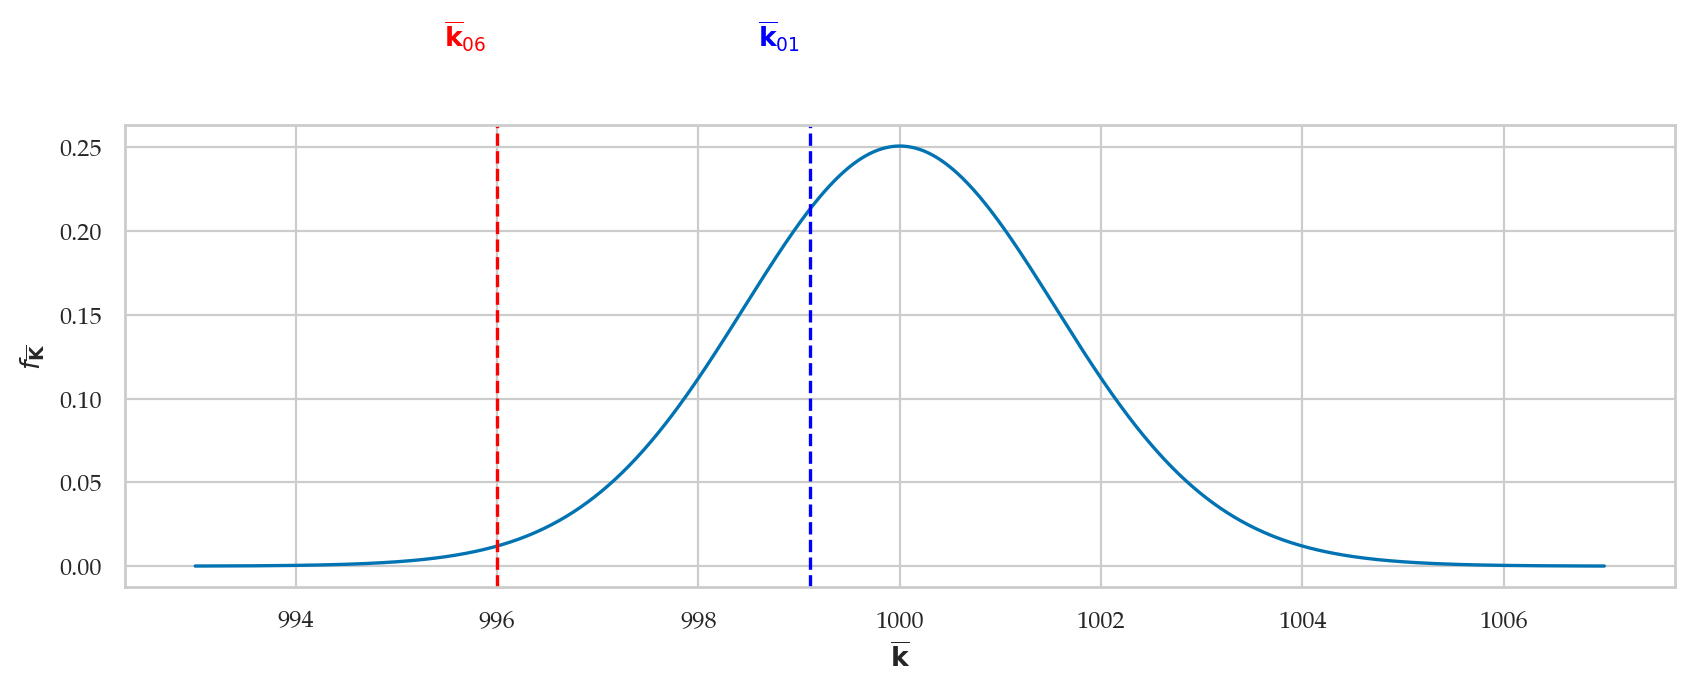

In [111]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]
ksample06 = kombucha[kombucha["batch"]==6]["volume"]

kbar01 = mean(ksample01)
kbar06 = mean(ksample06)
n = ksample01.count()

# analytical approx.
from scipy.stats import t as tdist
rvTKbar = tdist(df=n-1, loc=muK, scale=sigmaK/np.sqrt(n))
ax = plot_pdf(rvTKbar, xlims=[993,1007], color=blue)
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_xlabel(r"$\overline{\mathbf{k}}$")

# sample mean ksample01
ax.axvline(kbar01, linestyle="--", color="blue")
ax.text(kbar01-0.1, 0.31, r"$\overline{\mathbf{k}}_{01}$", ha="right", color="blue")

# sample mean ksample06
ax.axvline(kbar06, linestyle="--", color="red")
ax.text(kbar06-0.1, 0.31, r"$\overline{\mathbf{k}}_{06}$", ha="right", color="red");

## Discussion

Congratulations on surviving until the end this notebook!
In the remainder of this chapter and the next, we'll learn
about various applications of the formulas we introduces in this section.
Basically, it's all downhill from here.

In the next notebook, we'll learn how to use everything we learned about
sampling distributions to calculate [confidence intervals](./32_confidence_intervals.ipynb).